#En esta notebook:

*   Cargamos el Dataset 20News group y preprocesamos.
*   Hacemos los embeddigs: TF-IDF, LSA, LDA, Doc2Vec y DistilBert.
*   Reduccion de dimensionalidad y K-means. Se calcula la coherencia para cada embedding.
*   Visualización del clustering
*   Analisis del clustering
* Pureza, Matrices de confusión
* AMI






#Data set y preprocesamiento

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

# Descargar el conjunto de datos 20 Newsgroups
newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Crear un DataFrame a partir de los datos de newsgroups, incluyendo las etiquetas y los nombres de los tópicos
df_newsgroups = pd.DataFrame({
    'text': newsgroups_data.data,  # Los textos de los documentos
    'label': newsgroups_data.target,  # Las etiquetas de los documentos
    'topic': [newsgroups_data.target_names[label] for label in newsgroups_data.target]  # Los nombres de los tópicos
})

# Guardar el DataFrame en un archivo CSV
df_newsgroups.to_csv('20newsgroups_data_with_topics.csv', index=False)

# Mostrar el DataFrame creado
df_newsgroups.head()  # Mostrar las primeras filas del DataFrame


text  label  \
0  \n\nI am sure some bashers of Pens fans are pr...     10   
1  My brother is in the market for a high-perform...      3   
2  \n\n\n\n\tFinally you said what you dream abou...     17   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...      3   
4  1)    I have an old Jasmine drive which I cann...      4   

                      topic  
0          rec.sport.hockey  
1  comp.sys.ibm.pc.hardware  
2     talk.politics.mideast  
3  comp.sys.ibm.pc.hardware  
4     comp.sys.mac.hardware

In [ ]:
#limpieza de stopwords

from textblob import Word
from nltk.corpus import stopwords
import nltk

In [ ]:
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
stopword = stopwords.words('english')

In [ ]:
import re

def clean_text(text):
    return " ".join([Word(word).lemmatize() for word in re.sub("[^A-Za-z0-9]+", " ", text).lower().split() if word not in stopword])

In [ ]:
df_newsgroups["data_str"] = df_newsgroups.text.apply(lambda row: clean_text(row) )


In [ ]:
df_newsgroups[:10]

text  label  \
0  \n\nI am sure some bashers of Pens fans are pr...     10   
1  My brother is in the market for a high-perform...      3   
2  \n\n\n\n\tFinally you said what you dream abou...     17   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...      3   
4  1)    I have an old Jasmine drive which I cann...      4   
5  \n\nBack in high school I worked as a lab assi...     12   
6  \n\nAE is in Dallas...try 214/241-6060 or 214/...      4   
7  \n[stuff deleted]\n\nOk, here's the solution t...     10   
8  \n\n\nYeah, it's the second one.  And I believ...     10   
9  \nIf a Christian means someone who believes in...     19   

                      topic                                           data_str  
0          rec.sport.hockey  sure bashers pen fan pretty confused lack kind...  
1  comp.sys.ibm.pc.hardware  brother market high performance video card sup...  
2     talk.politics.mideast  finally said dream mediterranean new area grea...  
3  comp.sys.ibm.pc.hardware  think scsi card dma transfer disk scsi card dm...  
4     comp.sys.mac.hardware  1 old jasmine drive cannot use new system unde...  
5           sci.electronics  back high school worked lab assistant bunch ex...  
6     comp.sys.mac.hardware  ae dallas try 214 241 6060 214 241 0055 tech s...  
7          rec.sport.hockey  stuff deleted ok solution problem move canada ...  
8          rec.sport.hockey  yeah second one believe price trying get good ...  
9        talk.religion.misc  christian mean someone belief divinity jesus s...

#Embedings

1) tidf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Suponiendo que df_newsgroups tiene una columna llamada 'data_str' con los documentos en formato de texto
# Aplicamos TF-IDF a la columna 'data_str'
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df_newsgroups['data_str'])

# Convertir la matriz TF-IDF a DataFrame y agregarla al DataFrame original
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Agregar una nueva columna con la representación TF-IDF de cada documento (como vector)
df_newsgroups['tfidf_vector'] = list(X_tfidf.toarray())

# Mostrar las primeras filas para verificar el resultado
df_newsgroups.head()


text  label  \
0  \n\nI am sure some bashers of Pens fans are pr...     10   
1  My brother is in the market for a high-perform...      3   
2  \n\n\n\n\tFinally you said what you dream abou...     17   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...      3   
4  1)    I have an old Jasmine drive which I cann...      4   

                      topic  \
0          rec.sport.hockey   
1  comp.sys.ibm.pc.hardware   
2     talk.politics.mideast   
3  comp.sys.ibm.pc.hardware   
4     comp.sys.mac.hardware   

                                            data_str  \
0  sure bashers pen fan pretty confused lack kind...   
1  brother market high performance video card sup...   
2  finally said dream mediterranean new area grea...   
3  think scsi card dma transfer disk scsi card dm...   
4  1 old jasmine drive cannot use new system unde...   

                                        tfidf_vector  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

2) LSA

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Aplicar LSA (Latent Semantic Analysis) a la matriz TF-IDF
lsa = TruncatedSVD(n_components=100, random_state=42)  # Reducir a 100 componentes
X_lsa = lsa.fit_transform(X_tfidf)

# Convertir la matriz LSA a DataFrame y agregarla al DataFrame original
lsa_df = pd.DataFrame(X_lsa, columns=[f'lsa_component_{i}' for i in range(1, 101)])

# Agregar una nueva columna con la representación LSA de cada documento (como vector)
df_newsgroups['lsa_vector'] = list(X_lsa)

# Mostrar las primeras filas para verificar el resultado
df_newsgroups.head()


text  label  \
0  \n\nI am sure some bashers of Pens fans are pr...     10   
1  My brother is in the market for a high-perform...      3   
2  \n\n\n\n\tFinally you said what you dream abou...     17   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...      3   
4  1)    I have an old Jasmine drive which I cann...      4   

                      topic  \
0          rec.sport.hockey   
1  comp.sys.ibm.pc.hardware   
2     talk.politics.mideast   
3  comp.sys.ibm.pc.hardware   
4     comp.sys.mac.hardware   

                                            data_str  \
0  sure bashers pen fan pretty confused lack kind...   
1  brother market high performance video card sup...   
2  finally said dream mediterranean new area grea...   
3  think scsi card dma transfer disk scsi card dm...   
4  1 old jasmine drive cannot use new system unde...   

                                        tfidf_vector  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                          lsa_vector  
0  [0.11681027350353572, -0.04552303843894266, 0....  
1  [0.10963210152939168, 0.12729310225364007, 0.0...  
2  [0.1504232990278816, -0.10076830630019018, 0.0...  
3  [0.10402448441838198, 0.11080979637409255, 0.0...  
4  [0.1945556935906765, 0.15260460848894386, 0.02...

3)LDA

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorizar los documentos usando Bag of Words (BoW)
count_vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_bow = count_vectorizer.fit_transform(df_newsgroups['data_str'])


In [ ]:
import gensim
from gensim import corpora

# Crear diccionario a partir de los textos
dictionary = corpora.Dictionary([doc.split() for doc in df_newsgroups['data_str']])

# Crear corpus usando el diccionario creado
corpus = [dictionary.doc2bow(text.split()) for text in df_newsgroups['data_str']]

# Aplicar el modelo LDA
lda_model = gensim.models.LdaModel(corpus=corpus, num_topics=20, id2word=dictionary, passes=15, random_state=42)

# Imprimir los temas generados
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.189*"x" + 0.026*"n" + 0.015*"c" + 0.013*"entry" + 0.011*"lib"')
(1, '0.007*"key" + 0.007*"would" + 0.007*"use" + 0.006*"law" + 0.006*"government"')
(2, '0.025*"window" + 0.019*"file" + 0.013*"image" + 0.011*"do" + 0.011*"program"')
(3, '0.068*"bike" + 0.025*"dod" + 0.022*"motorcycle" + 0.017*"bmw" + 0.013*"draft"')
(4, '0.011*"available" + 0.011*"ftp" + 0.011*"image" + 0.009*"list" + 0.008*"user"')
(5, '0.233*"ax" + 0.028*"q" + 0.026*"p" + 0.023*"3" + 0.022*"r"')
(6, '0.033*"game" + 0.022*"team" + 0.013*"player" + 0.013*"year" + 0.010*"season"')
(7, '0.009*"people" + 0.009*"armenian" + 0.007*"said" + 0.006*"jew" + 0.005*"child"')
(8, '0.047*"edu" + 0.028*"com" + 0.016*"mail" + 0.012*"ca" + 0.011*"e"')
(9, '0.018*"would" + 0.015*"one" + 0.015*"like" + 0.014*"get" + 0.014*"know"')
(10, '0.085*"0" + 0.079*"1" + 0.058*"2" + 0.041*"3" + 0.038*"4"')
(11, '0.015*"drive" + 0.013*"card" + 0.011*"system" + 0.010*"disk" + 0.009*"2"')
(12, '0.035*"kinsey" + 0.009*"1f" + 0.009*"germany" + 0.

Para obtener los vectores de temas de LDA (Latent Dirichlet Allocation) para cada documento, se utiliza el modelo entrenado para generar una distribución de probabilidades de los temas para cada documento

In [ ]:
# Obtener los vectores de temas para cada documento
lda_vectors = [lda_model.get_document_topics(corpus[i], minimum_probability=0.0) for i in range(X_tfidf.shape[0])]

# Convertir los vectores en una matriz para agregar al DataFrame
lda_vectors_matrix = gensim.matutils.corpus2dense(lda_vectors, num_terms=20).T

# Agregar los vectores de temas LDA como una columna en el DataFrame
df_newsgroups['lda_vector'] = list(lda_vectors_matrix)

# Mostrar las primeras filas para verificar el resultado
df_newsgroups.head()


text  label  \
0  \n\nI am sure some bashers of Pens fans are pr...     10   
1  My brother is in the market for a high-perform...      3   
2  \n\n\n\n\tFinally you said what you dream abou...     17   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...      3   
4  1)    I have an old Jasmine drive which I cann...      4   

                      topic  \
0          rec.sport.hockey   
1  comp.sys.ibm.pc.hardware   
2     talk.politics.mideast   
3  comp.sys.ibm.pc.hardware   
4     comp.sys.mac.hardware   

                                            data_str  \
0  sure bashers pen fan pretty confused lack kind...   
1  brother market high performance video card sup...   
2  finally said dream mediterranean new area grea...   
3  think scsi card dma transfer disk scsi card dm...   
4  1 old jasmine drive cannot use new system unde...   

                                        tfidf_vector  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                          lsa_vector  \
0  [0.11681027350353572, -0.04552303843894266, 0....   
1  [0.10963210152939168, 0.12729310225364007, 0.0...   
2  [0.1504232990278816, -0.10076830630019018, 0.0...   
3  [0.10402448441838198, 0.11080979637409255, 0.0...   
4  [0.1945556935906765, 0.15260460848894386, 0.02...   

                                          lda_vector  
0  [0.0007065541, 0.12320544, 0.0007065541, 0.000...  
1  [0.0013528629, 0.0013528629, 0.07832217, 0.001...  
2  [0.0004603092, 0.03893024, 0.06018393, 0.00046...  
3  [0.0007258528, 0.06475212, 0.13836016, 0.00072...  
4  [0.00078186416, 0.00078186416, 0.0007818642, 0...

4) Doc2vec

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.utils import simple_preprocess
import multiprocessing
import pandas as pd

# 1. Preprocesamiento de los textos y etiquetado con labels
documents = df_newsgroups['data_str'].tolist()
labels = df_newsgroups['label'].tolist()

# Preprocesar y etiquetar los documentos con las etiquetas de la columna 'label'
tagged_data = [TaggedDocument(words=simple_preprocess(doc), tags=[topic]) for doc, topic in zip(documents, df_newsgroups['topic'])]


# 2. Configuración de los parámetros del modelo Doc2Vec
vector_size = 100     # Dimensionalidad de los vectores
window_size = 5       # Tamaño de la ventana de contexto
min_count = 2         # Frecuencia mínima de las palabras
epochs = 20           # Número de iteraciones de entrenamiento
dm = 1                # Usar modelo Distributed Memory (1) o DBOW (0)
workers = multiprocessing.cpu_count()  # Número de hilos disponibles

# 3. Crear y entrenar el modelo Doc2Vec
model = Doc2Vec(
    vector_size=vector_size,
    window=window_size,
    min_count=min_count,
    workers=workers,
    dm=dm,
    seed=42
)

# Construir el vocabulario
model.build_vocab(tagged_data)

# Entrenar el modelo
model.train(tagged_data, total_examples=model.corpus_count, epochs=epochs)

# 4. Obtener los vectores de cada documento
doc_vectors = [model.infer_vector(simple_preprocess(doc)) for doc in df_newsgroups['text']]

# 5. Agregar los vectores al DataFrame
df_newsgroups['doc2vec_vector'] = doc_vectors

# Mostrar el DataFrame con la nueva columna
df_newsgroups.head()


text  label  \
0  \n\nI am sure some bashers of Pens fans are pr...     10   
1  My brother is in the market for a high-perform...      3   
2  \n\n\n\n\tFinally you said what you dream abou...     17   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...      3   
4  1)    I have an old Jasmine drive which I cann...      4   

                      topic  \
0          rec.sport.hockey   
1  comp.sys.ibm.pc.hardware   
2     talk.politics.mideast   
3  comp.sys.ibm.pc.hardware   
4     comp.sys.mac.hardware   

                                            data_str  \
0  sure bashers pen fan pretty confused lack kind...   
1  brother market high performance video card sup...   
2  finally said dream mediterranean new area grea...   
3  think scsi card dma transfer disk scsi card dm...   
4  1 old jasmine drive cannot use new system unde...   

                                        tfidf_vector  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                          lsa_vector  \
0  [0.11681027350353572, -0.04552303843894266, 0....   
1  [0.10963210152939168, 0.12729310225364007, 0.0...   
2  [0.1504232990278816, -0.10076830630019018, 0.0...   
3  [0.10402448441838198, 0.11080979637409255, 0.0...   
4  [0.1945556935906765, 0.15260460848894386, 0.02...   

                                          lda_vector  \
0  [0.0007065541, 0.12320544, 0.0007065541, 0.000...   
1  [0.0013528629, 0.0013528629, 0.07832217, 0.001...   
2  [0.0004603092, 0.03893024, 0.06018393, 0.00046...   
3  [0.0007258528, 0.06475212, 0.13836016, 0.00072...   
4  [0.00078186416, 0.00078186416, 0.0007818642, 0...   

                                      doc2vec_vector  
0  [1.2331048, 0.7126053, 0.35589546, -0.03912276...  
1  [0.08053075, 0.27026215, 0.27537102, -0.201257...  
2  [0.46640444, -0.15863077, 0.07796419, 0.346338...  
3  [0.61429536, 0.236548, -0.32407716, 0.9912884,...  
4  [0.65558195, 0.26460865, 0.1570565, -0.0300177...

5) DistilBERT

DistilBERT, un modelo reducido de BERT, para generar embeddings de texto que capturan el significado de cada documento

In [ ]:
!pip install transformers datasets torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertModel
import numpy as np
import pandas as pd

# Cargar el tokenizer y el modelo DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# Mover el modelo a la GPU si está disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Suponiendo que 'data_str' es la columna con los textos en el DataFrame
# Limpiar los textos: eliminar valores nulos y asegurar que sean cadenas
texts = df_newsgroups['data_str'].fillna("").apply(str).tolist()

# Definir el tamaño del batch (ajustar según la capacidad de la GPU)
batch_size = 8

# Inicializar una lista para almacenar los embeddings
all_embeddings = []

# Procesar los textos en batches
for i in range(0, len(texts), batch_size):
    # Obtener el batch de textos
    batch_texts = texts[i:i+batch_size]

    # Tokenizar el batch de textos
    inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Mover los inputs a la GPU
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # Obtener los embeddings de DistilBERT utilizando GPU
    with torch.no_grad():  # Desactiva el cálculo de gradientes, ya que no estamos entrenando
        outputs = model(**inputs)

    # Obtener los embeddings de la última capa oculta
    last_hidden_states = outputs.last_hidden_state

    # Usar el primer token ([CLS]) como embedding del texto completo
    batch_embeddings = last_hidden_states[:, 0, :]  # Extraer el embedding del primer token

    # Mover los embeddings a la CPU y convertirlos en un array numpy
    all_embeddings.append(batch_embeddings.cpu().numpy())

# Concatenar todos los embeddings en una matriz final
embeddings_cpu = np.concatenate(all_embeddings, axis=0)

# Agregar los embeddings como una nueva columna en el DataFrame
df_newsgroups['bert'] = list(embeddings_cpu)

# Ver las primeras filas del DataFrame con los embeddings
print(df_newsgroups.head())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

                                                text  label  \
0  \n\nI am sure some bashers of Pens fans are pr...     10   
1  My brother is in the market for a high-perform...      3   
2  \n\n\n\n\tFinally you said what you dream abou...     17   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...      3   
4  1)    I have an old Jasmine drive which I cann...      4   

                      topic  \
0          rec.sport.hockey   
1  comp.sys.ibm.pc.hardware   
2     talk.politics.mideast   
3  comp.sys.ibm.pc.hardware   
4     comp.sys.mac.hardware   

                                            data_str  \
0  sure bashers pen fan pretty confused lack kind...   
1  brother market high performance video card sup...   
2  finally said dream mediterranean new area grea...   
3  think scsi card dma transfer disk scsi card dm...   
4  1 old jasmine drive cannot use new system unde...   

                                        tfidf_vector  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [ ]:
df_newsgroups[:10]

text  label  \
0  \n\nI am sure some bashers of Pens fans are pr...     10   
1  My brother is in the market for a high-perform...      3   
2  \n\n\n\n\tFinally you said what you dream abou...     17   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...      3   
4  1)    I have an old Jasmine drive which I cann...      4   
5  \n\nBack in high school I worked as a lab assi...     12   
6  \n\nAE is in Dallas...try 214/241-6060 or 214/...      4   
7  \n[stuff deleted]\n\nOk, here's the solution t...     10   
8  \n\n\nYeah, it's the second one.  And I believ...     10   
9  \nIf a Christian means someone who believes in...     19   

                      topic  \
0          rec.sport.hockey   
1  comp.sys.ibm.pc.hardware   
2     talk.politics.mideast   
3  comp.sys.ibm.pc.hardware   
4     comp.sys.mac.hardware   
5           sci.electronics   
6     comp.sys.mac.hardware   
7          rec.sport.hockey   
8          rec.sport.hockey   
9        talk.religion.misc   

                                            data_str  \
0  sure bashers pen fan pretty confused lack kind...   
1  brother market high performance video card sup...   
2  finally said dream mediterranean new area grea...   
3  think scsi card dma transfer disk scsi card dm...   
4  1 old jasmine drive cannot use new system unde...   
5  back high school worked lab assistant bunch ex...   
6  ae dallas try 214 241 6060 214 241 0055 tech s...   
7  stuff deleted ok solution problem move canada ...   
8  yeah second one believe price trying get good ...   
9  christian mean someone belief divinity jesus s...   

                                        tfidf_vector  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
5  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
6  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
7  [0.30288756972630243, 0.0, 0.0, 0.0, 0.0, 0.0,...   
8  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
9  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                          lsa_vector  \
0  [0.11681027350353572, -0.04552303843894266, 0....   
1  [0.10963210152939168, 0.12729310225364007, 0.0...   
2  [0.1504232990278816, -0.10076830630019018, 0.0...   
3  [0.10402448441838198, 0.11080979637409255, 0.0...   
4  [0.1945556935906765, 0.15260460848894386, 0.02...   
5  [0.08640616102666109, 0.018205466861834024, 0....   
6  [0.04001317050275735, 0.010708462064887502, 0....   
7  [0.12484826493498255, -0.019438757558286963, 0...   
8  [0.11145121812044005, -0.035963984178088756, 0...   
9  [0.07638401557992516, -0.09488751625228944, -0...   

                                          lda_vector  \
0  [0.0007065541, 0.12320544, 0.0007065541, 0.000...   
1  [0.0013528629, 0.0013528629, 0.07832217, 0.001...   
2  [0.0004603092, 0.03893024, 0.06018393, 0.00046...   
3  [0.0007258528, 0.06475212, 0.13836016, 0.00072...   
4  [0.00078186416, 0.00078186416, 0.0007818642, 0...   
5  [0.0012846489, 0.19748385, 0.14902842, 0.00128...   
6  [0.0033400054, 0.0033400054, 0.0033400054, 0.0...   
7  [0.00059198734, 0.00059198734, 0.00059198734, ...   
8  [0.0017274788, 0.0017274788, 0.0017274788, 0.0...   
9  [0.0012203444, 0.0012203444, 0.39309692, 0.001...   

                                      doc2vec_vector  \
0  [1.2331048, 0.7126053, 0.35589546, -0.03912276...   
1  [0.08053075, 0.27026215, 0.27537102, -0.201257...   
2  [0.46640444, -0.15863077, 0.07796419, 0.346338...   
3  [0.61429536, 0.236548, -0.32407716, 0.9912884,...   
4  [0.65558195, 0.26460865, 0.1570565, -0.0300177...   
5  [-0.038063645, 0.14405075, 0.0620317, 0.244263...   
6  [-0.028768094, 0.16181466, 0.023416609, 0.1314...   
7  [1.2889497, 1.5696305, 0.3704945, -0.24163207,...   
8  [0.18609644, 0.2256684, 0.16039503, 0

#Reduccion de dimensionalidad y K-means

1) PCA

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Función para aplicar PCA, calcular la varianza acumulada y determinar los componentes necesarios para el 90%
def aplicar_pca_y_calcular_varianza(df_column):
    n_samples, n_features = df_column.shape
    n_components = min(n_samples, n_features)  # Ajustar el número de componentes al mínimo entre muestras y características

    # Aplicar PCA
    pca = PCA(n_components=n_components)
    pca.fit(df_column)

    # Calcular la varianza acumulada
    varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

    # Determinar el número mínimo de componentes para el 90% de representatividad
    componentes_90 = np.argmax(varianza_acumulada >= 0.90) + 1

    return varianza_acumulada, componentes_90

# Listado de columnas con vectores para aplicar PCA
vector_columns = ['tfidf_vector', 'lsa_vector', 'lda_vector', 'doc2vec_vector','bert']

# Diccionario para almacenar los resultados de la varianza acumulada y los componentes necesarios
resultados_varianza = {}

# Aplicar PCA a cada columna de vectores
for column in vector_columns:
    # Obtener los datos de la columna como matriz
    data = np.stack(df_newsgroups[column].values)

    # Aplicar PCA y calcular la varianza acumulada
    varianza_acumulada, componentes_90 = aplicar_pca_y_calcular_varianza(data)

    # Guardar los resultados
    resultados_varianza[column] = {
        'varianza_acumulada': varianza_acumulada,
        'componentes_90': componentes_90
    }

# Mostrar los resultados
resultados_varianza




{'tfidf_vector': {'varianza_acumulada': array([0.00627013, 0.01074616, 0.01457019, ..., 1.        , 1.        ,
         1.        ]),
  'componentes_90': 2764},
 'lsa_vector': {'varianza_acumulada': array([0.03931495, 0.06730868, 0.09127324, 0.11411347, 0.13634752,
         0.15539737, 0.17402588, 0.19191982, 0.20921541, 0.22518462,
         0.24056509, 0.25563375, 0.26991519, 0.28329378, 0.29596738,
         0.30854054, 0.32090566, 0.33293749, 0.34483778, 0.35658224,
         0.36817703, 0.37946935, 0.39060184, 0.40156612, 0.41235644,
         0.4230587 , 0.43362001, 0.44398668, 0.45407318, 0.46410167,
         0.47405766, 0.48389295, 0.49366327, 0.50335957, 0.51301689,
         0.52253711, 0.53198935, 0.54139324, 0.55070505, 0.55991195,
         0.56899135, 0.57800184, 0.58692624, 0.59581822, 0.60468445,
         0.61345921, 0.62211599, 0.6307457 , 0.63932157, 0.64784199,
         0.65627084, 0.66463028, 0.67294646, 0.68119754, 0.68933995,
         0.69742405, 0.70544665, 0.71343018

In [ ]:
df_newsgroups[:10]

text  label  \
0  \n\nI am sure some bashers of Pens fans are pr...     10   
1  My brother is in the market for a high-perform...      3   
2  \n\n\n\n\tFinally you said what you dream abou...     17   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...      3   
4  1)    I have an old Jasmine drive which I cann...      4   
5  \n\nBack in high school I worked as a lab assi...     12   
6  \n\nAE is in Dallas...try 214/241-6060 or 214/...      4   
7  \n[stuff deleted]\n\nOk, here's the solution t...     10   
8  \n\n\nYeah, it's the second one.  And I believ...     10   
9  \nIf a Christian means someone who believes in...     19   

                      topic  \
0          rec.sport.hockey   
1  comp.sys.ibm.pc.hardware   
2     talk.politics.mideast   
3  comp.sys.ibm.pc.hardware   
4     comp.sys.mac.hardware   
5           sci.electronics   
6     comp.sys.mac.hardware   
7          rec.sport.hockey   
8          rec.sport.hockey   
9        talk.religion.misc   

                                            data_str  \
0  sure bashers pen fan pretty confused lack kind...   
1  brother market high performance video card sup...   
2  finally said dream mediterranean new area grea...   
3  think scsi card dma transfer disk scsi card dm...   
4  1 old jasmine drive cannot use new system unde...   
5  back high school worked lab assistant bunch ex...   
6  ae dallas try 214 241 6060 214 241 0055 tech s...   
7  stuff deleted ok solution problem move canada ...   
8  yeah second one believe price trying get good ...   
9  christian mean someone belief divinity jesus s...   

                                        tfidf_vector  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
5  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
6  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
7  [0.30288756972630243, 0.0, 0.0, 0.0, 0.0, 0.0,...   
8  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
9  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                          lsa_vector  \
0  [0.11681027350353572, -0.04552303843894266, 0....   
1  [0.10963210152939168, 0.12729310225364007, 0.0...   
2  [0.1504232990278816, -0.10076830630019018, 0.0...   
3  [0.10402448441838198, 0.11080979637409255, 0.0...   
4  [0.1945556935906765, 0.15260460848894386, 0.02...   
5  [0.08640616102666109, 0.018205466861834024, 0....   
6  [0.04001317050275735, 0.010708462064887502, 0....   
7  [0.12484826493498255, -0.019438757558286963, 0...   
8  [0.11145121812044005, -0.035963984178088756, 0...   
9  [0.07638401557992516, -0.09488751625228944, -0...   

                                                bert  \
0  [-0.17989391, -0.2267426, -0.0056382506, 0.142...   
1  [-0.20037137, -0.18687628, 0.031536765, 0.1885...   
2  [-0.07601455, -0.043952353, 0.07109551, -0.006...   
3  [-0.44137636, -0.23693706, -7.062335e-05, 0.08...   
4  [-0.23227593, -0.07899673, 0.05889999, 0.22270...   
5  [-0.141611, -0.10497232, -0.16690743, 0.166608...   
6  [0.017450962, -0.31656507, 0.18566488, 0.13522...   
7  [-0.18492408, -0.024443537, 0.03370344, 0.0129...   
8  [-0.04022862, -0.1663112, 0.14690591, -0.11169...   
9  [0.05824122, 0.0287347, -0.06371021, 0.0045464...   

                                          lda_vector  \
0  [0.0007065541, 0.12320544, 0.0007065541, 0.000...   
1  [0.0013528629, 0.0013528629, 0.07832217, 0.001...   
2  [0.0004603092, 0.03893024, 0.06018393, 0.00046...   
3  [0.0007258528, 0.06475212, 0.13836016, 0.00072...   
4  [0.00078186416, 0.00078186416, 0.0007818642, 0...   
5  [0.0012846489, 0.19748385, 0.14902842, 0.00128...   
6  [0.0033400054, 0.0033400054, 0.0033400054, 0.0...   
7  [0.00059198734, 0.00059198734, 0.00059198734, ...   
8  [0.0017274788, 0.0017274788, 0.001727

#K-means y coherencia C_v

In [ ]:
# Verificar el formato de las entradas de 'tfidf_vector'
print(df_newsgroups['tfidf_vector'].head())


0    [0. 0. 0. ... 0. 0. 0.]
1    [0. 0. 0. ... 0. 0. 0.]
2    [0. 0. 0. ... 0. 0. 0.]
3    [0. 0. 0. ... 0. 0. 0.]
4    [0. 0. 0. ... 0. 0. 0.]
Name: tfidf_vector, dtype: object


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Filtrar y convertir tfidf_vector a arrays numéricos
tfidf_data = []
for vector in df_newsgroups['tfidf_vector']:
    if isinstance(vector, str):  # Si es una cadena, intenta convertirla
        try:
            numeric_vector = np.fromstring(vector.strip('[]'), sep=' ')
            if numeric_vector.size > 0:  # Asegura que el array no esté vacío
                tfidf_data.append(numeric_vector)
        except ValueError:
            continue
    elif isinstance(vector, (list, np.ndarray)):
        tfidf_data.append(np.array(vector))

# Convertir la lista a un array de NumPy
tfidf_data = np.array(tfidf_data)

# Comprobar las dimensiones antes de aplicar PCA
print(f"Dimensiones de tfidf_data: {tfidf_data.shape}")

# Aplicar PCA si el número de componentes es válido
n_components = min(2764, tfidf_data.shape[1])
pca = PCA(n_components=n_components)
tfidf_pca = pca.fit_transform(tfidf_data)

# Mostrar la cantidad de varianza explicada por los componentes
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
print(f"Varianza acumulada con {n_components} componentes: {varianza_acumulada[-1]:.4f}")

# Aplicar K-Means con 20 clusters a los datos transformados por PCA
kmeans = KMeans(n_clusters=20, random_state=42)
clusters = kmeans.fit_predict(tfidf_pca)

# Agregar los clusters al DataFrame (solo las filas válidas)
df_newsgroups = df_newsgroups.iloc[:len(clusters)]
df_newsgroups['cluster_tfidf'] = clusters

# Ver las primeras filas del DataFrame con los clusters
print(df_newsgroups[['text', 'cluster_tfidf']].head())



Dimensiones de tfidf_data: (18846, 5000)
Varianza acumulada con 2764 componentes: 0.8971
                                                text  cluster_tfidf
0  \n\nI am sure some bashers of Pens fans are pr...             10
1  My brother is in the market for a high-perform...             11
2  \n\n\n\n\tFinally you said what you dream abou...              7
3  \nThink!\n\nIt's the SCSI card doing the DMA t...             11
4  1)    I have an old Jasmine drive which I cann...             11


<ipython-input-18-1735822e1b9c>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newsgroups['cluster_tfidf'] = clusters


In [ ]:
import gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

# Paso 1: Preprocesar y tokenizar los documentos
df_newsgroups['tokens'] = df_newsgroups['text'].apply(lambda x: gensim.utils.simple_preprocess(x))

# Paso 2: Crear un diccionario y corpus a partir de los tokens
dictionary = Dictionary(df_newsgroups['tokens'])
corpus = [dictionary.doc2bow(text) for text in df_newsgroups['tokens']]

# Paso 3: Agrupar los documentos por cada cluster y generar una lista de palabras por cluster
cluster_tokens = {i: [] for i in range(20)}  # Crear diccionario para cada cluster

for i, cluster in enumerate(df_newsgroups['cluster_tfidf']):
    cluster_tokens[cluster].extend(df_newsgroups.iloc[i]['tokens'])

# Crear la lista de palabras de cada cluster
cluster_texts = list(cluster_tokens.values())

# Paso 4: Calcular el modelo de coherencia con el método `c_v`
coherence_model = CoherenceModel(
    topics=cluster_texts,
    texts=df_newsgroups['tokens'].tolist(),
    dictionary=dictionary,
    coherence='c_v'
)
coherence_score = coherence_model.get_coherence()

print(f"Coherencia C_v de los clusters en relación con los tópicos originales: {coherence_score:.4f}")


Coherencia C_v de los clusters en relación con los tópicos originales: 0.3840


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# Convertir cada entrada de 'lsa_vector' en un array NumPy, si es necesario
lsa_data = []
for vector in df_newsgroups['lsa_vector']:
    if isinstance(vector, str):  # Si es una cadena, convertirla a array
        numeric_vector = np.fromstring(vector.strip('[]'), sep=' ')
        lsa_data.append(numeric_vector)
    else:
        lsa_data.append(vector)  # Si ya es un array, usarlo directamente

lsa_data = np.array(lsa_data)

# Aplicar PCA con 84 componentes
pca = PCA(n_components=84)
lsa_pca = pca.fit_transform(lsa_data)

# Mostrar la cantidad de varianza explicada por los 84 componentes
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
print(f"Varianza acumulada con 84 componentes: {varianza_acumulada[-1]:.4f}")

# Aplicar K-Means con 20 clusters a los datos transformados por PCA
kmeans = KMeans(n_clusters=20, random_state=42)
clusters = kmeans.fit_predict(lsa_pca)

# Agregar los clusters al DataFrame
df_newsgroups['cluster_lsa'] = clusters

# Ver las primeras filas del DataFrame con los clusters
print(df_newsgroups[['text', 'cluster_lsa']].head())


Varianza acumulada con 84 componentes: 0.9002
                                                text  cluster_lsa
0  \n\nI am sure some bashers of Pens fans are pr...            5
1  My brother is in the market for a high-perform...           17
2  \n\n\n\n\tFinally you said what you dream abou...           16
3  \nThink!\n\nIt's the SCSI card doing the DMA t...            8
4  1)    I have an old Jasmine drive which I cann...            8


In [ ]:
import gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

# Paso 1: Preprocesar y tokenizar los documentos (si no están ya tokenizados)
if 'tokens' not in df_newsgroups.columns:
    df_newsgroups['tokens'] = df_newsgroups['text'].apply(lambda x: gensim.utils.simple_preprocess(x))

# Paso 2: Crear un diccionario y corpus a partir de los tokens
dictionary = Dictionary(df_newsgroups['tokens'])
corpus = [dictionary.doc2bow(text) for text in df_newsgroups['tokens']]

# Paso 3: Agrupar los documentos por cada cluster en cluster_lsa y generar una lista de palabras por cluster
num_clusters = df_newsgroups['cluster_lsa'].nunique()
cluster_tokens = {i: [] for i in range(num_clusters)}  # Crear diccionario para cada cluster

for i, cluster in enumerate(df_newsgroups['cluster_lsa']):
    cluster_tokens[cluster].extend(df_newsgroups.iloc[i]['tokens'])

# Crear la lista de palabras de cada cluster
cluster_texts = list(cluster_tokens.values())

# Paso 4: Calcular el modelo de coherencia con el método `c_v`
coherence_model = CoherenceModel(
    topics=cluster_texts,
    texts=df_newsgroups['tokens'].tolist(),
    dictionary=dictionary,
    coherence='c_v'
)
coherence_score = coherence_model.get_coherence()

print(f"Coherencia C_v de los clusters LSA en relación con los tópicos originales: {coherence_score:.4f}")


Coherencia C_v de los clusters LSA en relación con los tópicos originales: 0.3688


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# Convertir cada entrada de 'lda_vector' en un array NumPy, si es necesario
lda_data = []
for vector in df_newsgroups['lda_vector']:
    if isinstance(vector, str):  # Si es una cadena, convertirla a array
        numeric_vector = np.fromstring(vector.strip('[]'), sep=' ')
        lda_data.append(numeric_vector)
    else:
        lda_data.append(vector)  # Si ya es un array, usarlo directamente

lda_data = np.array(lda_data)

# Aplicar PCA con 9 componentes
pca = PCA(n_components=9)
lda_pca = pca.fit_transform(lda_data)

# Mostrar la cantidad de varianza explicada por los 9 componentes
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
print(f"Varianza acumulada con 9 componentes: {varianza_acumulada[-1]:.4f}")

# Aplicar K-Means con 20 clusters a los datos transformados por PCA
kmeans = KMeans(n_clusters=20, random_state=42)
clusters_lda = kmeans.fit_predict(lda_pca)

# Agregar los clusters al DataFrame
df_newsgroups['clusters_lda'] = clusters_lda

# Ver las primeras filas del DataFrame con los clusters
print(df_newsgroups[['text', 'clusters_lda']].head())



Varianza acumulada con 9 componentes: 0.9195
                                                text  clusters_lda
0  \n\nI am sure some bashers of Pens fans are pr...             9
1  My brother is in the market for a high-perform...             7
2  \n\n\n\n\tFinally you said what you dream abou...            15
3  \nThink!\n\nIt's the SCSI card doing the DMA t...             7
4  1)    I have an old Jasmine drive which I cann...             7


In [ ]:
import gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

# Paso 1: Tokenizar los documentos (si no está hecho previamente)
if 'tokens' not in df_newsgroups.columns:
    df_newsgroups['tokens'] = df_newsgroups['text'].apply(lambda x: gensim.utils.simple_preprocess(x))

# Paso 2: Crear un diccionario y corpus usando los tokens de los documentos
dictionary = Dictionary(df_newsgroups['tokens'])
corpus = [dictionary.doc2bow(text) for text in df_newsgroups['tokens']]

# Paso 3: Organizar los documentos en listas de palabras para cada cluster
num_clusters = df_newsgroups['clusters_lda'].nunique()
cluster_tokens = {i: [] for i in range(num_clusters)}

# Agrupar los tokens de cada documento en su respectivo cluster
for i, cluster in enumerate(df_newsgroups['clusters_lda']):
    cluster_tokens[cluster].extend(df_newsgroups.iloc[i]['tokens'])

# Crear una lista con las palabras agrupadas por cluster
cluster_texts = list(cluster_tokens.values())

# Paso 4: Calcular la coherencia C_v utilizando la lista de palabras por cluster
coherence_model = CoherenceModel(
    topics=cluster_texts,
    texts=df_newsgroups['tokens'].tolist(),
    dictionary=dictionary,
    coherence='c_v'
)
coherence_score = coherence_model.get_coherence()

print(f"Coherencia C_v para clusters generados con LDA: {coherence_score:.4f}")


Coherencia C_v para clusters generados con LDA: 0.3557


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# Convertir cada entrada de 'doc2vec_vector' en un array NumPy si es necesario
doc2vec_data = []
for vector in df_newsgroups['doc2vec_vector']:
    if isinstance(vector, str):  # Si es una cadena, convertirla en un array
        numeric_vector = np.fromstring(vector.strip('[]'), sep=' ')
        doc2vec_data.append(numeric_vector)
    else:
        doc2vec_data.append(vector)  # Si ya es un array, usarlo directamente

doc2vec_data = np.array(doc2vec_data)

# Aplicar PCA con 59 componentes
pca = PCA(n_components=59)
doc2vec_pca = pca.fit_transform(doc2vec_data)

# Mostrar la cantidad de varianza explicada por los 59 componentes
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
print(f"Varianza acumulada con 59 componentes: {varianza_acumulada[-1]:.4f}")

# Aplicar K-Means con 20 clusters a los datos transformados por PCA
kmeans = KMeans(n_clusters=20, random_state=42)
clusters_doc2vec = kmeans.fit_predict(doc2vec_pca)

# Agregar los clusters al DataFrame
df_newsgroups['clusters_doc2vec'] = clusters_doc2vec

# Ver las primeras filas del DataFrame con los clusters
print(df_newsgroups[['text', 'clusters_doc2vec']].head())


Varianza acumulada con 59 componentes: 0.9003
                                                text  clusters_doc2vec
0  \n\nI am sure some bashers of Pens fans are pr...                19
1  My brother is in the market for a high-perform...                17
2  \n\n\n\n\tFinally you said what you dream abou...                 6
3  \nThink!\n\nIt's the SCSI card doing the DMA t...                 3
4  1)    I have an old Jasmine drive which I cann...                19


In [ ]:
import gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

# Paso 1: Tokenizar los documentos (si no está hecho previamente)
if 'tokens' not in df_newsgroups.columns:
    df_newsgroups['tokens'] = df_newsgroups['text'].apply(lambda x: gensim.utils.simple_preprocess(x))

# Paso 2: Crear un diccionario y corpus usando los tokens de los documentos
dictionary = Dictionary(df_newsgroups['tokens'])
corpus = [dictionary.doc2bow(text) for text in df_newsgroups['tokens']]

# Paso 3: Organizar los documentos en listas de palabras para cada cluster
num_clusters = df_newsgroups['clusters_doc2vec'].nunique()
cluster_tokens = {i: [] for i in range(num_clusters)}

# Agrupar los tokens de cada documento en su respectivo cluster
for i, cluster in enumerate(df_newsgroups['clusters_doc2vec']):
    cluster_tokens[cluster].extend(df_newsgroups.iloc[i]['tokens'])

# Crear una lista con las palabras agrupadas por cluster
cluster_texts = list(cluster_tokens.values())

# Paso 4: Calcular la coherencia C_v utilizando la lista de palabras por cluster
coherence_model = CoherenceModel(
    topics=cluster_texts,
    texts=df_newsgroups['tokens'].tolist(),
    dictionary=dictionary,
    coherence='c_v'
)
coherence_score = coherence_model.get_coherence()

print(f"Coherencia C_v para clusters generados con Doc2Vec: {coherence_score:.4f}")


Coherencia C_v para clusters generados con Doc2Vec: 0.4346


In [ ]:
# Aplicar PCA con 98 componentes a la columna 'bert' y después un K-Means de 20 clusters

# Obtener los vectores BERT del DataFrame
bert_data = np.stack(df_newsgroups['bert'].values)

# Aplicar PCA con 98 componentes
pca = PCA(n_components=98)
bert_pca = pca.fit_transform(bert_data)

# Mostrar la cantidad de varianza explicada por los 98 componentes
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
print(f"Varianza acumulada con 98 componentes: {varianza_acumulada[-1]:.4f}")

# Aplicar K-Means con 20 clusters a los datos transformados por PCA
kmeans = KMeans(n_clusters=20, random_state=42)
clusters_bert = kmeans.fit_predict(bert_pca)

# Agregar los clusters al DataFrame
df_newsgroups['cluster_bert'] = clusters_bert

# Ver las primeras filas del DataFrame con los clusters
df_newsgroups.head()


Varianza acumulada con 98 componentes: 0.9007


text  label  \
0  \n\nI am sure some bashers of Pens fans are pr...     10   
1  My brother is in the market for a high-perform...      3   
2  \n\n\n\n\tFinally you said what you dream abou...     17   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...      3   
4  1)    I have an old Jasmine drive which I cann...      4   

                      topic  \
0          rec.sport.hockey   
1  comp.sys.ibm.pc.hardware   
2     talk.politics.mideast   
3  comp.sys.ibm.pc.hardware   
4     comp.sys.mac.hardware   

                                            data_str  \
0  sure bashers pen fan pretty confused lack kind...   
1  brother market high performance video card sup...   
2  finally said dream mediterranean new area grea...   
3  think scsi card dma transfer disk scsi card dm...   
4  1 old jasmine drive cannot use new system unde...   

                                        tfidf_vector  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                          lsa_vector  \
0  [0.11681027350353572, -0.04552303843894266, 0....   
1  [0.10963210152939168, 0.12729310225364007, 0.0...   
2  [0.1504232990278816, -0.10076830630019018, 0.0...   
3  [0.10402448441838198, 0.11080979637409255, 0.0...   
4  [0.1945556935906765, 0.15260460848894386, 0.02...   

                                          lda_vector  \
0  [0.0007065541, 0.12320544, 0.0007065541, 0.000...   
1  [0.0013528629, 0.0013528629, 0.07832217, 0.001...   
2  [0.0004603092, 0.03893024, 0.06018393, 0.00046...   
3  [0.0007258528, 0.06475212, 0.13836016, 0.00072...   
4  [0.00078186416, 0.00078186416, 0.0007818642, 0...   

                                      doc2vec_vector  \
0  [1.2331048, 0.7126053, 0.35589546, -0.03912276...   
1  [0.08053075, 0.27026215, 0.27537102, -0.201257...   
2  [0.46640444, -0.15863077, 0.07796419, 0.346338...   
3  [0.61429536, 0.236548, -0.32407716, 0.9912884,...   
4  [0.65558195, 0.26460865, 0.1570565, -0.0300177...   

                                                bert  cluster_tfidf  \
0  [-0.17989391, -0.2267426, -0.0056382506, 0.142...             10   
1  [-0.20037137, -0.18687628, 0.031536765, 0.1885...             11   
2  [-0.07601455, -0.043952353, 0.07109551, -0.006...              7   
3  [-0.44137636, -0.23693706, -7.062335e-05, 0.08...             11   
4  [-0.23227593, -0.07899673, 0.05889999, 0.22270...             11   

                                              tokens  cluster_lsa  \
0  [am, sure, some, bashers, of, pens, fans, are,...            5   
1  [my, brother, is, in, the, market, for, high, ...           17   
2  [finally, you, said, what, you, dream, about, ...           16   
3  [think, it, the, scsi, card, doing, the, dma, ...            8   
4  [have, an, old, jasmine, drive, which, cannot,...            8   

   clusters_lda  clusters_doc2vec  cluster_bert  
0             9                19            15  
1             7                17            13  
2            15                 6            17  
3             7                 3            19  
4             7                19             0

In [ ]:
import gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Paso 1: Tokenizar los documentos (si no está hecho previamente)
if 'tokens' not in df_newsgroups.columns:
    df_newsgroups['tokens'] = df_newsgroups['text'].apply(lambda x: gensim.utils.simple_preprocess(x))

# Paso 2: Crear un diccionario y corpus usando los tokens de los documentos
dictionary = Dictionary(df_newsgroups['tokens'])
corpus = [dictionary.doc2bow(text) for text in df_newsgroups['tokens']]

# Paso 3: Obtener los vectores BERT y aplicar PCA
bert_data = np.stack(df_newsgroups['bert'].values)
pca = PCA(n_components=98)
bert_pca = pca.fit_transform(bert_data)

# Paso 4: Aplicar K-Means con 20 clusters
kmeans = KMeans(n_clusters=20, random_state=42)
clusters_bert = kmeans.fit_predict(bert_pca)

# Agregar los clusters al DataFrame
df_newsgroups['cluster_bert'] = clusters_bert

# Paso 5: Organizar los documentos en listas de palabras para cada cluster
num_clusters = df_newsgroups['cluster_bert'].nunique()
cluster_tokens = {i: [] for i in range(num_clusters)}

# Agrupar los tokens de cada documento en su respectivo cluster
for i, cluster in enumerate(df_newsgroups['cluster_bert']):
    cluster_tokens[cluster].extend(df_newsgroups.iloc[i]['tokens'])

# Crear una lista con las palabras agrupadas por cluster
cluster_texts = list(cluster_tokens.values())

# Paso 6: Calcular la coherencia C_v utilizando la lista de palabras por cluster
coherence_model = CoherenceModel(
    topics=cluster_texts,
    texts=df_newsgroups['tokens'].tolist(),
    dictionary=dictionary,
    coherence='c_v'
)
coherence_score = coherence_model.get_coherence()

print(f"Coherencia C_v para clusters generados con BERT: {coherence_score:.4f}")


Coherencia C_v para clusters generados con BERT: 0.3711


In [ ]:
# Guardar el DataFrame en formato CSV en la ubicación deseada en Google Drive
df_newsgroups.to_csv('/content/drive/MyDrive/TEXTmining/df_newsgroups_with_bert.csv', index=False)

##Visualizacion del clustering en 2d

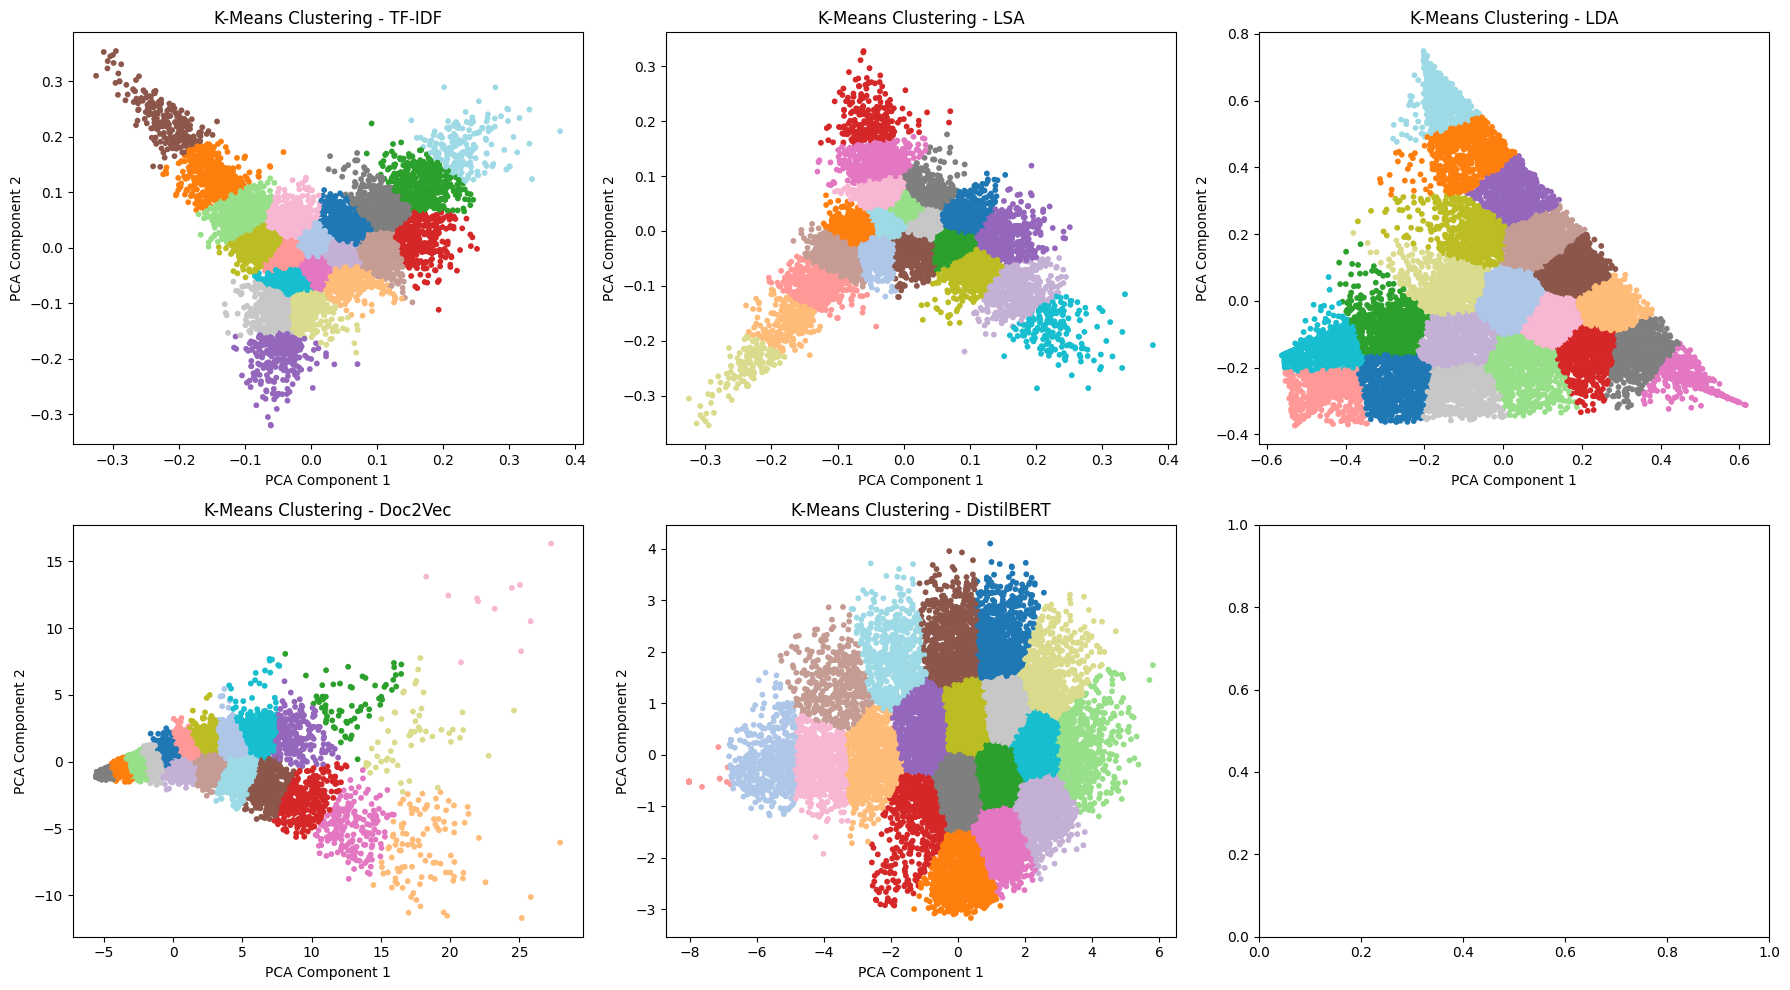

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Definir las columnas de los vectores que queremos visualizar
vector_columns = ['tfidf_vector', 'lsa_vector', 'lda_vector', 'doc2vec_vector', 'bert']
titles = ['TF-IDF', 'LSA', 'LDA', 'Doc2Vec','DistilBERT' ]

# Crear la figura y subplots (matriz de gráficos)
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.ravel()  # Aplanar el array de ejes para un acceso más fácil

# Loop para aplicar K-Means y hacer los gráficos para cada tipo de vector
for i, column in enumerate(vector_columns):
    # Convertir la columna a array de NumPy
    data = np.array(df_newsgroups[column].tolist())

    # Aplicar PCA para reducir a 2 componentes (para visualización)
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)

    # Aplicar K-Means con 20 clusters
    kmeans = KMeans(n_clusters=20, random_state=42)
    clusters = kmeans.fit_predict(reduced_data)

    # Hacer el scatter plot en 2D
    axs[i].scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='tab20', s=10)
    axs[i].set_title(f"K-Means Clustering - {titles[i]}")
    axs[i].set_xlabel("PCA Component 1")
    axs[i].set_ylabel("PCA Component 2")

# Ajustar el layout
plt.tight_layout()
plt.show()


# Analizamos los clusters para cada embeding


In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min
from collections import Counter
import pandas as pd

# Función para calcular la información del cluster
def calcular_informacion_cluster(data, clusters, textos, topicos, kmeans_model):
    df_resultados = []

    # Iterar por cada cluster
    for cluster in range(kmeans_model.n_clusters):
        # Filtrar los datos que pertenecen a este cluster
        puntos_cluster = data[clusters == cluster]
        textos_cluster = textos[clusters == cluster]
        topicos_cluster = topicos[clusters == cluster]

        # Obtener el centroide
        centroide = kmeans_model.cluster_centers_[cluster]

        # Calcular el punto más cercano al centroide
        closest, _ = pairwise_distances_argmin_min([centroide], puntos_cluster)
        texto_mas_cercano = textos_cluster[closest[0]]
        topico_mas_cercano = topicos_cluster[closest[0]]

        # Calcular la distancia máxima de los puntos al centroide
        distancias = np.linalg.norm(puntos_cluster - centroide, axis=1)
        distancia_maxima = np.max(distancias)

        # Contar la cantidad de puntos en el cluster
        cantidad_puntos = len(puntos_cluster)

        # Contar los tópicos distintos en el cluster
        topicos_distintos = list(set(topicos_cluster))
        cantidad_topicos_distintos = len(topicos_distintos)

        # Guardar la información del cluster en el DataFrame
        df_resultados.append({
            'cluster': cluster,
            'centroide': centroide,
            'texto_mas_cercano': texto_mas_cercano,
            'topico_mas_cercano': topico_mas_cercano,
            'distancia_maxima': distancia_maxima,
            'cantidad_puntos': cantidad_puntos,
            'topicos_distintos': topicos_distintos,
            'cantidad_topicos_distintos': cantidad_topicos_distintos  # Nueva columna
        })

    return pd.DataFrame(df_resultados)

# Columnas de vectores que vamos a utilizar
vector_columns = ['tfidf_vector', 'lsa_vector', 'lda_vector', 'doc2vec_vector','bert']
df_clusters = {}

# Iterar sobre cada conjunto de vectores
for column in vector_columns:
    # Convertir la columna en un array de NumPy
    data = np.array(df_newsgroups[column].tolist())

    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)

    # Aplicar K-Means con 20 clusters
    kmeans = KMeans(n_clusters=20, random_state=42)
    clusters = kmeans.fit_predict(reduced_data)

    # Calcular la información del cluster
    textos = df_newsgroups['text'].values
    topicos = df_newsgroups['topic'].values

    df_cluster_info = calcular_informacion_cluster(reduced_data, clusters, textos, topicos, kmeans)

    # Guardar los resultados para esta columna
    df_clusters[column] = df_cluster_info

# Ver los resultados para TF-IDF
df_clusters['tfidf_vector']


cluster                                       centroide  \
0         0     [0.06779233735117578, 0.009937904104428717]   
1         1   [-0.024641680576129588, -0.01892120309357403]   
2         2     [-0.11790698165496155, 0.08821183044071348]   
3         3      [0.16141548168100237, 0.11482083560074692]   
4         4    [-0.05298946061109677, -0.19964093685628925]   
5         5     [-0.03631076160770443, 0.03449025525138331]   
6         6      [-0.2324304874227694, 0.24253464719526965]   
7         7    [0.01817990125672587, -0.007444518621193222]   
8         8     [0.1173606997458667, -0.011503666621908548]   
9         9    [-0.03153420069599837, -0.06947758544593462]   
10       10  [-0.06033589245270691, -0.0003541370092687702]   
11       11   [0.0029055772431098104, -0.04582156017064469]   
12       12       [0.1681742804254504, 0.03235313328704833]   
13       13     [0.05118403053293995, -0.04299499224889169]   
14       14    [0.029766013261450036, 0.044727145441900394]   
15       15     [0.10174102059316167, 0.062429499223710105]   
16       16      [-0.0917662692074434, 0.03763837483741188]   
17       17    [-0.03460285105492984, -0.12606003316352163]   
18       18      [-0.1648992852270719, 0.15146436081642142]   
19       19       [0.2311776726412499, 0.17922479502101674]   

                                    texto_mas_cercano  \
0   ..continuing on my build problems, I got stuck...   
1   \n\nThis has now been thrown out by the courts...   
2   \n[ Deletia; in case anybody hadn't noticed, F...   
3   I am scanning in a color image and it looks fi...   
4   I was thinking about who on each of the teams ...   
5   \nactually,  teh D means the registered driver...   
6   iank@microsoft.com (Ian Kennedy) writes...\n\n...   
7   \nSure sounds like aXe to me.\n\n-- \n\nMichae...   
8   \n\nNo.  The simple $25 style IDE controller d...   
9   \nOh no!  Say it isn't so!\n\n\nYes, Yl|nen is...   
10  \n\n: medtronic.COM (Dale M. Skiba) entirely m...   
11  <stuff deleted>\n \n\t\t\t\t\t<other stuff del...   
12  \n\nI have tried others, but I think that the ...   
13  I'm looking to buy a 100% working keyboard for...   
14  While there are too many PS clones to count, s...   
15  I am saving an image on one machine and redisp...   
16  \nLike it or not, Edward, Anwar has a very goo...   
17  \n\tDummy Hoy, a late 19th-Century baseball pl...   
18  Rick Anderson replied to my letter with...\n\n...   
19  : \n: Does anyone know what the vfintd.386 dev...   

          topico_mas_cercano  distancia_maxima  cantidad_puntos  \
0             comp.windows.x          0.035622             1297   
1                  sci.crypt          0.038872             2523   
2                alt.atheism          0.112597              683   
3              comp.graphics          0.129584              480   
4           rec.sport.hockey          0.123615              257   
5         talk.politics.misc          0.087618              973   
6         talk.religion.misc          0.136032              162   
7             comp.windows.x          0.036495             1707   
8   comp.sys.ibm.pc.hardware          0.124188              640   
9           rec.sport.hockey          0.082264              879   
10        talk.religion.misc          0.083660             1535   
11     comp.sys.mac.hardware          0.061676             2747   
12  comp.sys.ibm.pc.hardware          0.090261              355   
13              misc.forsale          0.105981              930   
14   comp.os.ms-windows.misc          0.120189              576   
15            comp.windows.x          0.101250              843   
16     talk.politics.mideast          0.076462             1161   
17        rec.sport.baseball          0.120808              574   
18        talk.religion.misc          0.078359              340   
19   comp.os.ms-windows.misc          0.149115              184   

                                    topicos_distintos  \
0   [comp.graphic

In [ ]:
df_clusters['lsa_vector']

cluster                                       centroide  \
0         0     [0.08733802224388716, 0.022946313784381004]   
1         1    [-0.04428400921907765, -0.03382486033480052]   
2         2  [-0.06559773397607592, 0.00034510515358215585]   
3         3    [-0.17433555203812975, -0.16647086790393337]   
4         4     [0.07243452484789824, -0.02497175280110271]   
5         5    [0.001793199094717639, 0.038901071007731644]   
6         6     [-0.05120038322028252, 0.20226825451140343]   
7         7    [-0.12835231878253897, -0.10086117383428407]   
8         8    [0.14779685197264178, -0.011238826937914621]   
9         9     [0.16843458860055735, -0.10980668030082325]   
10       10    [0.014245996206542563, -0.03143931680177923]   
11       11      [-0.0970936819485577, -0.0461326966685137]   
12       12     [-0.03993269514473402, 0.12448458403341095]   
13       13    [-0.028285909500482022, 0.06408960995690456]   
14       14      [0.03436375882865002, 0.06929908398630412]   
15       15    [0.032558813972382764, 0.011814385792366464]   
16       16     [0.10544023767208681, -0.07157385934478741]   
17       17    [-0.23667367981599108, -0.24895925272386224]   
18       18     [0.23130769663439568, -0.18051934736650677]   
19       19   [-0.024943614344071826, 0.014369543586340051]   

                                    texto_mas_cercano  \
0   \n\n\n\n\n\nIt is a data aquisition board for ...   
1   \nI tried to do so, but people told me that ev...   
2   \n\nIn the interest of accuracy (seems a liitl...   
3   I am a good Catholic boy. A convert no less, a...   
4   [This belongs in comp.windows.x.i386unix - I'v...   
5   \n\tWhen I'm riding my 900RR, my goodies are a...   
6   I was thinking about who on each of the teams ...   
7   \nOh no, not again.\n\nThere is a difference b...   
8   Greetings:\n\nHere is a list of items for the ...   
9   I recently set Windows 3.1 up on my 486DX-33 V...   
10  \n\tWell know I know how you can afford a Harl...   
11  From: dhammers@pacific.? (David Hammerslag)\n\...   
12  \n\tThe garbage started hitting the field well...   
13  \n\n\nYou haven't been facing major league pit...   
14  Hey,\n   I have some Star Trek Christmas Ornam...   
15  I am urgently looking for the following articl...   
16  Yeah... and BMW 525e has 2.7 litres\n\t\t535  ...   
17  \nNo smiley on the part about atheism, I see. ...   
18  : \n: Does anyone know what the vfintd.386 dev...   
19  \n\nBelieve Bugatti's coming(has) out  one.  S...   

         topico_mas_cercano  distancia_maxima  cantidad_puntos  \
0     comp.sys.mac.hardware          0.103186              772   
1   comp.os.ms-windows.misc          0.087510             1038   
2        talk.politics.guns          0.082795             1441   
3    soc.religion.christian          0.070916              255   
4            comp.windows.x          0.052399             1152   
5           rec.motorcycles          0.031240             2817   
6          rec.sport.hockey          0.125857              264   
7               alt.atheism          0.113720              579   
8              misc.forsale          0.137844              600   
9   comp.os.ms-windows.misc          0.134056              499   
10          rec.motorcycles          0.091724              780   
11   soc.religion.christian          0.075052             1121   
12       rec.sport.baseball          0.091971              585   
13       rec.sport.baseball          0.076048             1037   
14             misc.forsale          0.111022              602   
15           comp.windows.x          0.035950             1712   
16                rec.autos          0.118580              706   
17   soc.religion.christian          0.127438              140   
18  comp.os.ms-windows.misc          0.148322              178   
19                rec.autos          0.037545             2568   

                                    topicos_distintos  \
0   [comp.graphics, soc.religion.chris

In [ ]:
df_clusters['lda_vector']

cluster                   centroide  \
0         0   [-0.27554414, -0.2448411]   
1         1   [0.022079298, 0.00196369]   
2         2   [-0.08359541, 0.44298625]   
3         3  [0.25877014, -0.024622742]   
4         4   [-0.2883711, -0.07604474]   
5         5  [0.049481124, -0.20129363]   
6         6   [0.22439231, -0.14041613]   
7         7  [-0.44555336, -0.27613676]   
8         8   [0.026694417, 0.31577596]   
9         9  [-0.11928096, -0.12361155]   
10       10    [0.17351064, 0.08491896]   
11       11   [0.088920526, 0.17756006]   
12       12   [0.46854678, -0.23417129]   
13       13   [0.1321713, -0.056404132]   
14       14    [0.3419576, -0.15845288]   
15       15  [-0.10721594, -0.26715496]   
16       16  [-0.075692296, 0.20107573]   
17       17  [-0.13531531, 0.045130894]   
18       18   [-0.4521617, -0.13977559]   
19       19     [-0.1597005, 0.6068247]   

                                    texto_mas_cercano  \
0   I just purchased a Viewsonic 17 and and Orchid...   
1   \nProbably within 50 years, it will be possibl...   
2   Heres a story of a Saint that people might lik...   
3   \nAll true.  And all good points.\n\n\n\nWell,...   
4   Your Custom Resume On Disk!\n \n              ...   
5   \n\n\nI think I have the same problem. I think...   
6   \n\nplease tell me where you where you FTP'd t...   
7   \nThink!\n\nIt's the SCSI card doing the DMA t...   
8   As of yet, there has been no description of th...   
9   Hello all!\n\nFor few past days I've been figh...   
10  pdb059@ipl.jpl.nasa.gov (Paul Bartholomew) wri...   
11  I seldom see any posts in this group. Is anyon...   
12  \n- They invented the "how to make money on ot...   
13  My father is a huge Tiger fan, and I am a loya...   
14  \n\nAn extended ride as a passenger on a 750 n...   
15  I'm trying to bring in 8+ bits to a PC, and wo...   
16  I need quotes from Jefferson, Hamilton, Madiso...   
17  Voting for creation of the newsgroup misc.heal...   
18  \n\n\n I believe so, since the Buslogic cards ...   
19  What is the basis of the idea of hell being a ...   

          topico_mas_cercano  distancia_maxima  cantidad_puntos  \
0   comp.sys.ibm.pc.hardware          0.126688              847   
1                    sci.med          0.111136             1148   
2     soc.religion.christian          0.243938              767   
3                    sci.med          0.119303             1119   
4               misc.forsale          0.256576              908   
5    comp.os.ms-windows.misc          0.180789              828   
6              comp.graphics          0.195355             1185   
7   comp.sys.ibm.pc.hardware          0.135380              607   
8                  sci.crypt          0.119264              899   
9      comp.sys.mac.hardware          0.109206              861   
10        talk.politics.misc          0.119491             1258   
11    soc.religion.christian          0.123480             1184   
12   comp.os.ms-windows.misc          0.167173              418   
13        rec.sport.baseball          0.093983             1330   
14           rec.motorcycles          0.170201             1100   
15           sci.electronics          0.140478              618   
16        talk.politics.guns          0.295362              815   
17                   sci.med          0.291680             1611   
18  comp.sys.ibm.pc.hardware          0.211196              760   
19    soc.religion.christian          0.170504              583   

                                    topicos_distintos  \
0   [comp.graphics, sci.med, comp.sys.mac.hardware...   
1   [talk.religion.misc, sci.crypt, comp.os.ms-win...   
2   [talk.religion.misc, sci.crypt, comp.os.ms-win...   
3   [talk.religion.misc, sci.crypt, comp.os.ms-win...   
4   [talk.religion.misc, sci.crypt, comp.os.ms-win...   
5   [talk.religion.misc, sci.crypt, comp.os.ms-win...   
6   [talk.religion.misc, sci.crypt, comp.os.ms-win...   
7   [comp.graphics, talk.politics.guns

In [ ]:
df_clusters['doc2vec_vector']

cluster                   centroide  \
0         0    [-0.9747935, 0.24815427]   
1         1      [14.983051, -2.088475]   
2         2   [-3.4696648, -0.38823128]   
3         3      [3.6711702, 1.7007684]   
4         4     [4.5645375, -1.4540714]   
5         5        [6.136777, 2.549861]   
6         6   [-4.9026966, -0.83901626]   
7         7    [2.7919393, -0.43382302]   
8         8  [-2.2159207, -0.041682906]   
9         9      [15.746389, 4.2316737]   
10       10      [17.699858, -7.131095]   
11       11        [9.38679, 2.3648777]   
12       12       [9.544533, -3.136808]   
13       13       [23.614223, 10.60913]   
14       14     [0.28468576, 0.8246123]   
15       15    [0.8276364, -0.41484332]   
16       16      [7.012121, -2.1904263]   
17       17      [12.510628, -5.393598]   
18       18      [1.8501009, 1.2157325]   
19       19      [5.635524, 0.22232863]   

                                    texto_mas_cercano  \
0   \n\n\nBobby, there's a question here that I ju...   
1   Archive-name: ripem/faq\nLast-update: Sun, 7 M...   
2   \n No, it appears he didn't. Well, I think he'...   
3   So it looks like I'm going to have to put a co...   
4   /(me)\n\n/(hudson)\n/Why does that make someth...   
5   % telnet csrc.ncsl.nist.gov 25\n       Trying....   
6   \nTry xviewgl.\n(filename xviewgl_v1.1.tar.Z o...   
7   \nI hope there is not one- with a subject like...   
8   One can only remap special-command keys in pro...   
9   {Send follow ups to comp.sys.mac.advocacy. Sor...   
10  [This is a co-authored report from two of us w...   
11  \nDoes it do it to all tapes?  Were the two ta...   
12  [deleted]\nthink:\n[deleted]\n                ...   
13  ---------- cut here ---------- part 03/03\nM2C...   
14  I am posting the following for my brother. Ple...   
15  # ## Absolutely nothing, seeing as there is no...   
16  \n\nYes the govt handled it in the Rambo Holly...   
17  \nAaron> Colossians 2:11-12 "In him you were a...   
18  Forsale:\nNintendo control Deck with two contr...   
19  \nNo one else seems to know, so I'll post this...   

          topico_mas_cercano  distancia_maxima  cantidad_puntos  \
0                alt.atheism          1.735743             2699   
1                  sci.crypt          4.271883               60   
2         talk.politics.guns          1.158014             2881   
3            rec.motorcycles          3.620155              949   
4         talk.religion.misc          2.111450              447   
5                  sci.crypt          5.540679              407   
6              comp.graphics          1.027383             2023   
7                alt.atheism          1.917421              804   
8    comp.os.ms-windows.misc          1.903180             2806   
9      comp.sys.mac.hardware          8.151076               67   
10        talk.politics.guns          9.478374               80   
11  comp.sys.ibm.pc.hardware          5.444946              211   
12               alt.atheism          3.393286              274   
13   comp.os.ms-windows.misc          6.799477               12   
14                   sci.med          2.325088             1862   
15        talk.politics.misc          2.041417              991   
16        talk.politics.misc          2.537978              365   
17    soc.religion.christian          3.644115              155   
18              misc.forsale          2.421655             1416   
19                   sci.med          2.296201              337   

                                    topicos_distintos  \
0   [talk.religion.misc, sci.crypt, comp.os.ms-win...   
1   [rec.motorcycles, talk.politics.guns, alt.athe...   
2   [talk.religion.misc, sci.crypt, comp.os.ms-win...   
3   [sci.crypt, comp.sys.ibm.pc.hardware, comp.os....   
4   [talk.politics.guns, soc.religion.christian, s...   
5   [comp.graphics, sci.med, comp.sys.mac.hardware...   
6   [talk.religion.misc, sci.crypt, comp.os.ms-win...   
7   [comp.graphics, rec.motorcycles, s

In [ ]:
df_clusters['bert']

cluster                   centroide  \
0         0      [1.2776961, 2.1916425]   
1         1     [-5.61997, -0.12725033]   
2         2     [0.1894144, -2.3115087]   
3         3    [-2.5579693, -0.1283326]   
4         4    [1.1895257, -0.41253117]   
5         5     [3.6923409, 0.10975344]   
6         6    [-1.1988508, -1.1680783]   
7         7     [-8.013612, -0.5262802]   
8         8      [-1.0088687, 0.421167]   
9         9     [2.4226835, -1.0234311]   
10       10    [-0.12829924, 2.1614993]   
11       11      [-3.641621, 1.3195461]   
12       12     [1.2589694, -1.6250265]   
13       13   [-4.0746174, -0.19992706]   
14       14  [0.059055038, -0.64189243]   
15       15     [1.3780205, 0.82788146]   
16       16      [0.2833367, 0.6547638]   
17       17       [2.689698, 1.5039308]   
18       18      [2.286565, 0.11221609]   
19       19     [-1.9145701, 1.9053333]   

                                    texto_mas_cercano  \
0   We are in the process of evaluating X-terminal...   
1                          Look for Spice or PSpice\n   
2   \n\nNonsense.  I quite clearly state that it w...   
3   actions  \nthe \nthem\n\nThis is, of course, y...   
4   We are making a transition from NextStep to X-...   
5   I used to be on lopid.  It did a good job of r...   
6   \nWell, it seems we don't learn the lessons of...   
7                                                       
8   \nWhat is "aluminium siding"?  I keep seeing r...   
9   \n\nI don't think that it is "obvious" that "l...   
10  \nWell Bill, There are 2MB soldered on the log...   
11  \n[stuff about changing windows registration o...   
12  \n<In response to a debate about who has has a...   
13  They looked unto him, and were lightened:\n\ta...   
14  \nCould be the (folk?) song "Clementine".  If ...   
15  I am thinking about getting an Infiniti G20.\n...   
16  For Sale:\n\n    Roland TR-606 Drum Machine\n ...   
17  \nBattery powered devices like the PowerBook a...   
18  \nI pondered it for all of ten seconds when I ...   
19  I have the following Nth Engine graphics cards...   

         topico_mas_cercano  distancia_maxima  cantidad_puntos  \
0            comp.windows.x          1.934634              849   
1           sci.electronics          1.724536              553   
2          rec.sport.hockey          1.648148             1078   
3        talk.politics.guns          1.702612              828   
4            comp.windows.x          0.763816             1684   
5                   sci.med          2.676568              662   
6        talk.politics.guns          2.071048              656   
7        talk.religion.misc          1.226651              549   
8        talk.religion.misc          1.035031              992   
9        rec.sport.baseball          1.510829             1186   
10    comp.sys.mac.hardware          1.796744              869   
11  comp.os.ms-windows.misc          1.754578              451   
12         rec.sport.hockey          1.261158             1409   
13       talk.religion.misc          1.728176              689   
14                sci.space          0.913163             1466   
15                rec.autos          0.849141             1173   
16             misc.forsale          0.954505             1282   
17    comp.sys.mac.hardware          2.206275              749   
18              alt.atheism          0.867484             1143   
19             misc.forsale          1.936166              578   

                                    topicos_distintos  \
0   [comp.graphics, soc.religion.christian, sci.me...   
1   [talk.religion.misc, sci.crypt, comp.os.ms-win...   
2   [talk.religion.misc, sci.crypt, comp.sys.ibm.p...   
3   [talk.religion.misc, sci.crypt, comp.os.ms-win...   
4   [talk.religion.misc, sci.crypt, comp.os.ms-win...   
5   [talk.religion.misc, sci.crypt, comp.sys.ibm.p...   
6   [talk.religion.misc, sci.crypt, comp.os.ms-win...   
7   [talk.religion.misc, sci.crypt, comp.os.ms-win...   
8 

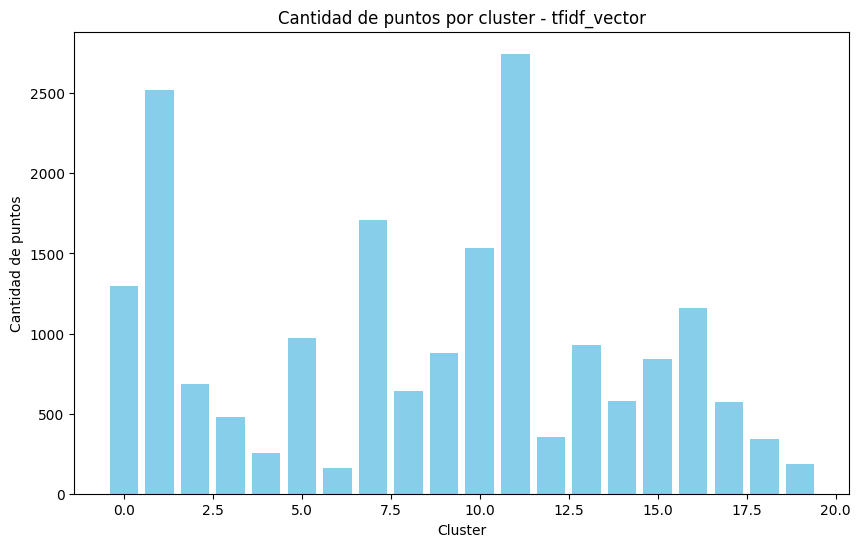

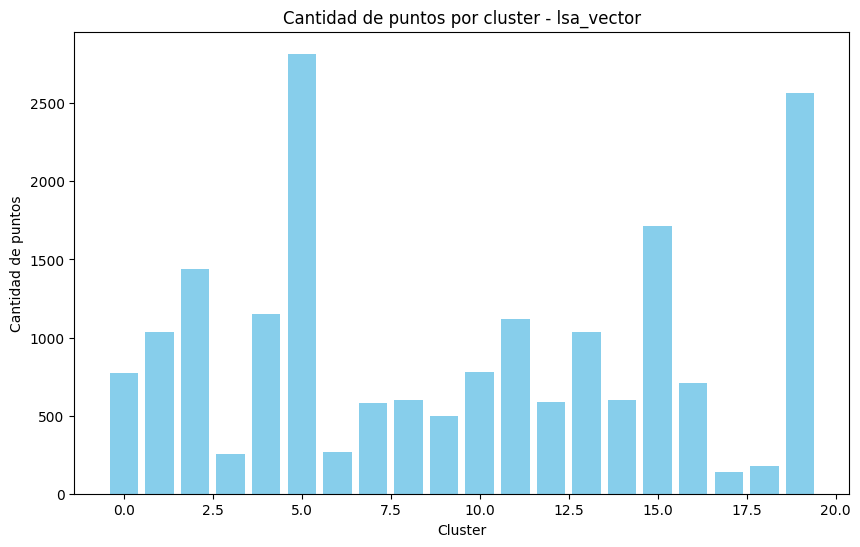

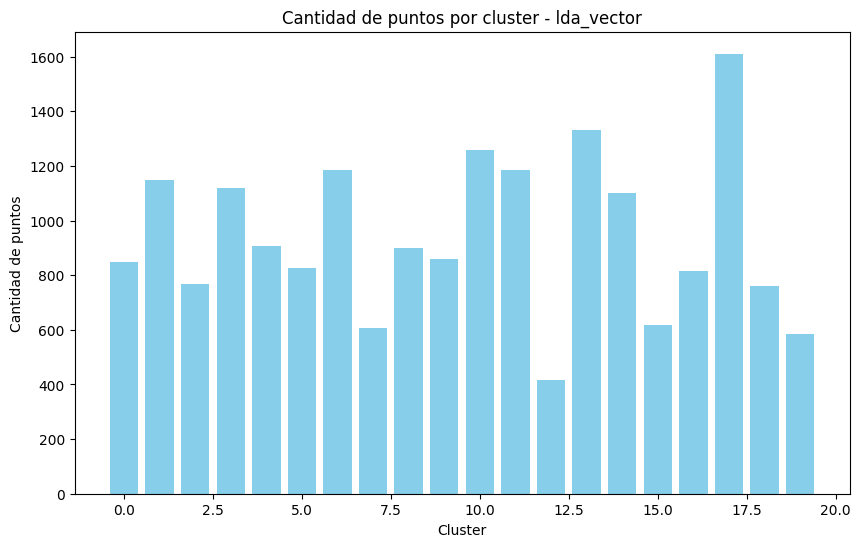

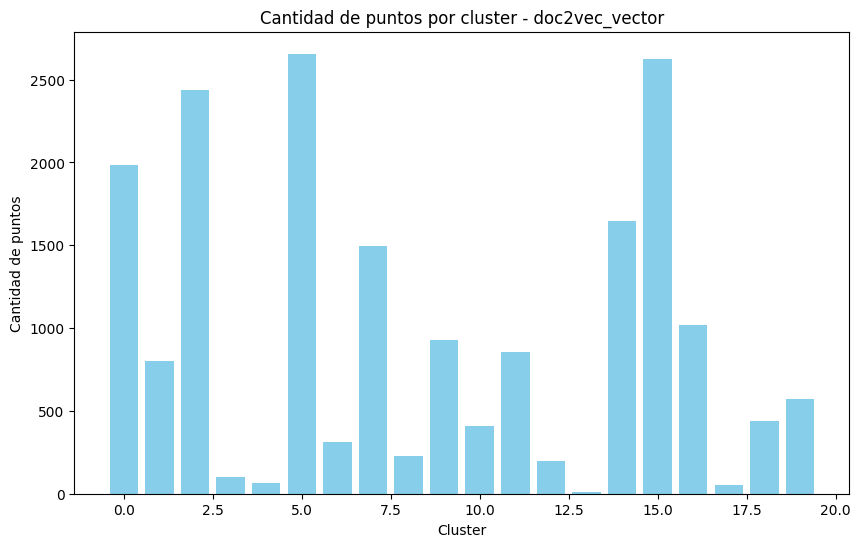

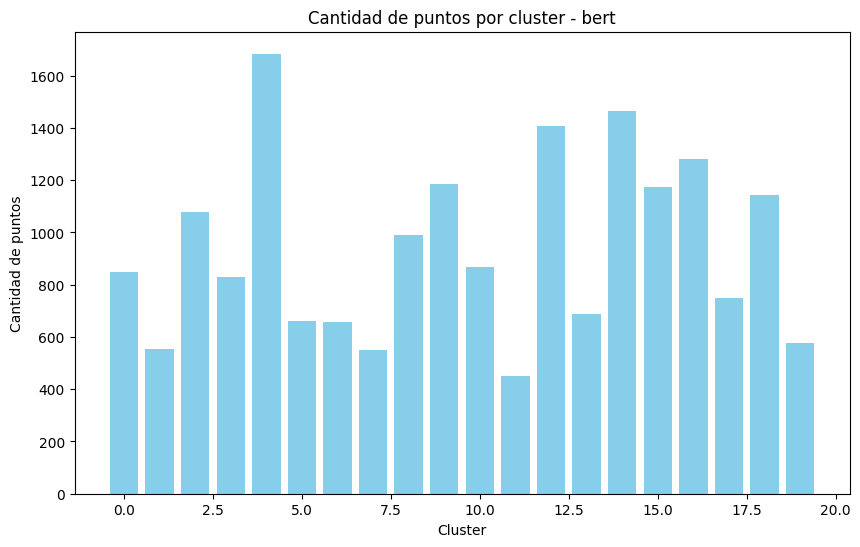

In [ ]:
#Visualizacion cantidad de puntos por cluster

import matplotlib.pyplot as plt

# Función para hacer un gráfico de barras de la columna 'cantidad_puntos' para un df_cluster específico
def plot_cantidad_puntos(df_cluster, title):
    plt.figure(figsize=(10, 6))
    plt.bar(df_cluster['cluster'], df_cluster['cantidad_puntos'], color='skyblue')
    plt.xlabel('Cluster')
    plt.ylabel('Cantidad de puntos')
    plt.title(f'Cantidad de puntos por cluster - {title}')
    plt.show()

# Generar los gráficos de barras para cada df_cluster
for column in vector_columns:
    plot_cantidad_puntos(df_clusters[column], column)


In [ ]:
# Agregamos al df_cluster Calcular el porcentaje de puntos que corresponde a cada tópico

from sklearn.metrics import pairwise_distances_argmin_min
from collections import Counter
import pandas as pd

# Función para calcular la información del cluster
def calcular_informacion_cluster(data, clusters, textos, topicos, kmeans_model):
    df_resultados = []

    # Iterar por cada cluster
    for cluster in range(kmeans_model.n_clusters):
        # Filtrar los datos que pertenecen a este cluster
        puntos_cluster = data[clusters == cluster]
        textos_cluster = textos[clusters == cluster]
        topicos_cluster = topicos[clusters == cluster]

        # Obtener el centroide
        centroide = kmeans_model.cluster_centers_[cluster]

        # Calcular el punto más cercano al centroide
        closest, _ = pairwise_distances_argmin_min([centroide], puntos_cluster)
        texto_mas_cercano = textos_cluster[closest[0]]
        topico_mas_cercano = topicos_cluster[closest[0]]

        # Calcular la distancia máxima de los puntos al centroide
        distancias = np.linalg.norm(puntos_cluster - centroide, axis=1)
        distancia_maxima = np.max(distancias)

        # Contar la cantidad de puntos en el cluster
        cantidad_puntos = len(puntos_cluster)

        # Contar los tópicos distintos en el cluster
        conteo_topicos = Counter(topicos_cluster)
        topicos_distintos = list(conteo_topicos.keys())
        cantidad_topicos_distintos = len(topicos_distintos)

        # Calcular el porcentaje de puntos que corresponde a cada tópico
        porcentaje_topicos = {topico: (conteo / cantidad_puntos) * 100 for topico, conteo in conteo_topicos.items()}

        # Guardar la información del cluster en el DataFrame
        df_resultados.append({
            'cluster': cluster,
            'centroide': centroide,
            'texto_mas_cercano': texto_mas_cercano,
            'topico_mas_cercano': topico_mas_cercano,
            'distancia_maxima': distancia_maxima,
            'cantidad_puntos': cantidad_puntos,
            'topicos_distintos': topicos_distintos,
            'cantidad_topicos_distintos': cantidad_topicos_distintos,  # Nueva columna
            'porcentaje_topicos': porcentaje_topicos  # Porcentaje de puntos por tópico
        })

    return pd.DataFrame(df_resultados)

# Columnas de vectores que vamos a utilizar
vector_columns = ['tfidf_vector', 'lsa_vector', 'lda_vector', 'doc2vec_vector', 'bert']
df_clusters = {}

# Iterar sobre cada conjunto de vectores
for column in vector_columns:
    # Convertir la columna en un array de NumPy
    data = np.array(df_newsgroups[column].tolist())

    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)

    # Aplicar K-Means con 20 clusters
    kmeans = KMeans(n_clusters=20, random_state=42)
    clusters = kmeans.fit_predict(reduced_data)

    # Calcular la información del cluster
    textos = df_newsgroups['text'].values
    topicos = df_newsgroups['topic'].values

    df_cluster_info = calcular_informacion_cluster(reduced_data, clusters, textos, topicos, kmeans)

    # Guardar los resultados para esta columna
    df_clusters[column] = df_cluster_info

# Ver los resultados para TF-IDF
df_clusters['tfidf_vector']




cluster                                      centroide  \
0         0     [0.1021674449479763, 0.059644395849273925]   
1         1   [-0.03006196059580983, -0.02264838068032075]   
2         2    [-0.11868072781446891, 0.09038645407741708]   
3         3     [0.22573599016967033, 0.17108395621336406]   
4         4   [-0.05054316739382801, -0.19970480191895695]   
5         5    [-0.03912921806189081, 0.04821030102504787]   
6         6      [-0.2324738614905936, 0.2431531418759725]   
7         7  [0.0022883893498545824, -0.04067730379830764]   
8         8   [0.040906373783156744, -0.06811021428497747]   
9         9   [0.09387735270849043, -0.008842889168133635]   
10       10     [0.15582826615189935, 0.10805612312347647]   
11       11     [0.15804268032462698, 0.01354283783191275]   
12       12     [0.05256240493019826, 0.03111412641591337]   
13       13  [0.038516586227137176, -0.014290862065929081]   
14       14     [-0.16585946164635013, 0.1522098526568202]   
15       15   [-0.06014671018607184, 0.004370871446681955]   
16       16    [-0.09572073854351204, 0.03862836356028659]   
17       17  [-0.027621592801485535, -0.06995063987917712]   
18       18   [-0.03996346458990929, -0.12512526652608266]   
19       19  [-0.004360648840486693, 0.005831623662436722]   

                                    texto_mas_cercano  \
0   I am setting up my DOS/UNIX box on a 116M IDE ...   
1   \nI suppose after Waco, it's only prudent to l...   
2   \nWelcome.\n\n\nHm. I get a little queasy arou...   
3   Sorry, I did`nt tell exactly what I need.\n\nI...   
4   YAHOOOOOOOOO!\n\nThe Habs tied this sucker at ...   
5   \n\n\nActually, there was very little to the b...   
6   iank@microsoft.com (Ian Kennedy) writes...\n\n...   
7   \nThere's plenty of legroom on the Kawasaki KL...   
8   I'm posting this for a friend, but you can e-m...   
9   Are there anyone who wants to sell used 386dx-...   
10  : \n: Has anyone found a fix for the following...   
11  Organization: Compact Solutions, Canberra ACT ...   
12  : \n: >I've got the 6.0 spec (obviously since ...   
13  \nIs there such a thing as the new '94 Eagle T...   
14  Rick Anderson replied to my letter with...\n\n...   
15                                                ...   
16  I'm interested if anyone out here can point me...   
17  \n\n\n\n\n\n\n\n\tI'll go with Mark Grace, and...   
18  SH>I'm a hockey fan from way back, and maintai...   
19  \nThis isn't true.  Today's criminals regularl...   

          topico_mas_cercano  distancia_maxima  cantidad_puntos  \
0    comp.os.ms-windows.misc          0.129301              822   
1                  sci.crypt          0.043704             2107   
2     soc.religion.christian          0.112113              645   
3    comp.os.ms-windows.misc          0.155879              226   
4           rec.sport.hockey          0.121194              255   
5     soc.religion.christian          0.083423              693   
6         talk.religion.misc          0.135786              161   
7            rec.motorcycles          0.032178             2916   
8               misc.forsale          0.107638              586   
9   comp.sys.ibm.pc.hardware          0.108432              979   
10            comp.windows.x          0.133629              532   
11  comp.sys.ibm.pc.hardware          0.131369              458   
12             comp.graphics          0.079500             1032   
13                 rec.autos          0.039027             1563   
14        talk.religion.misc          0.079434              333   
15              misc.forsale          0.086732             1712   
16    soc.religion.christian          0.073517             1042   
17        rec.sport.baseball          0.086079              890   
18          rec.sport.hockey          0.093725              560   
19                 sci.crypt          0.042553             1334   

                                    topicos_distintos  \
0   [comp.windows.x, comp.graphics, co

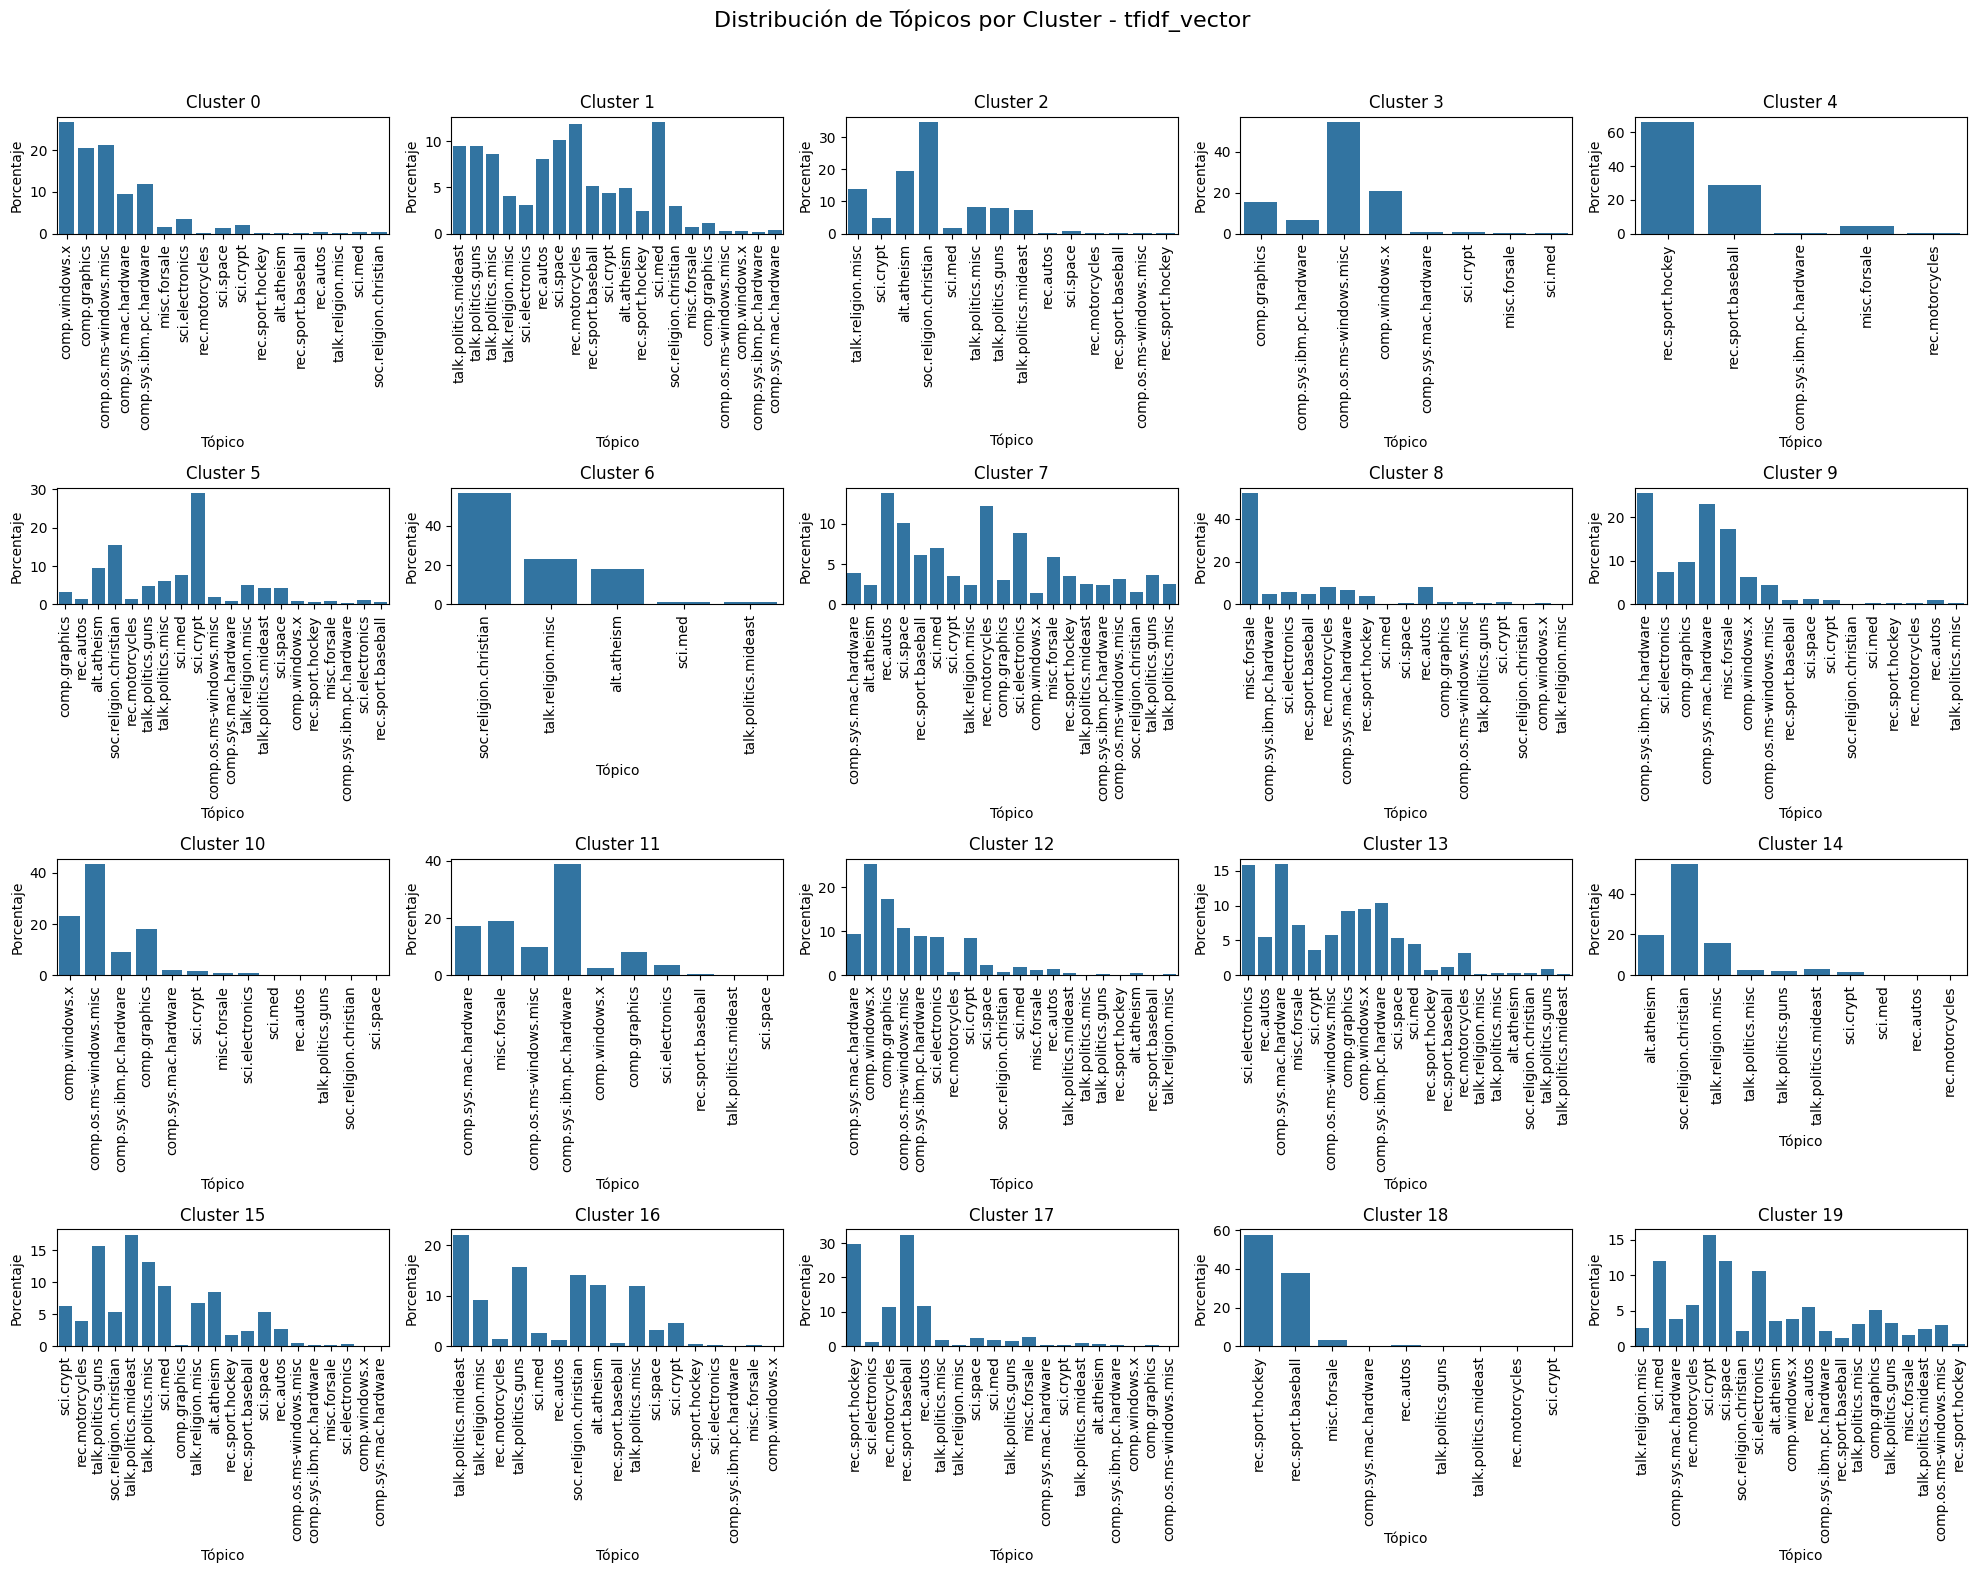

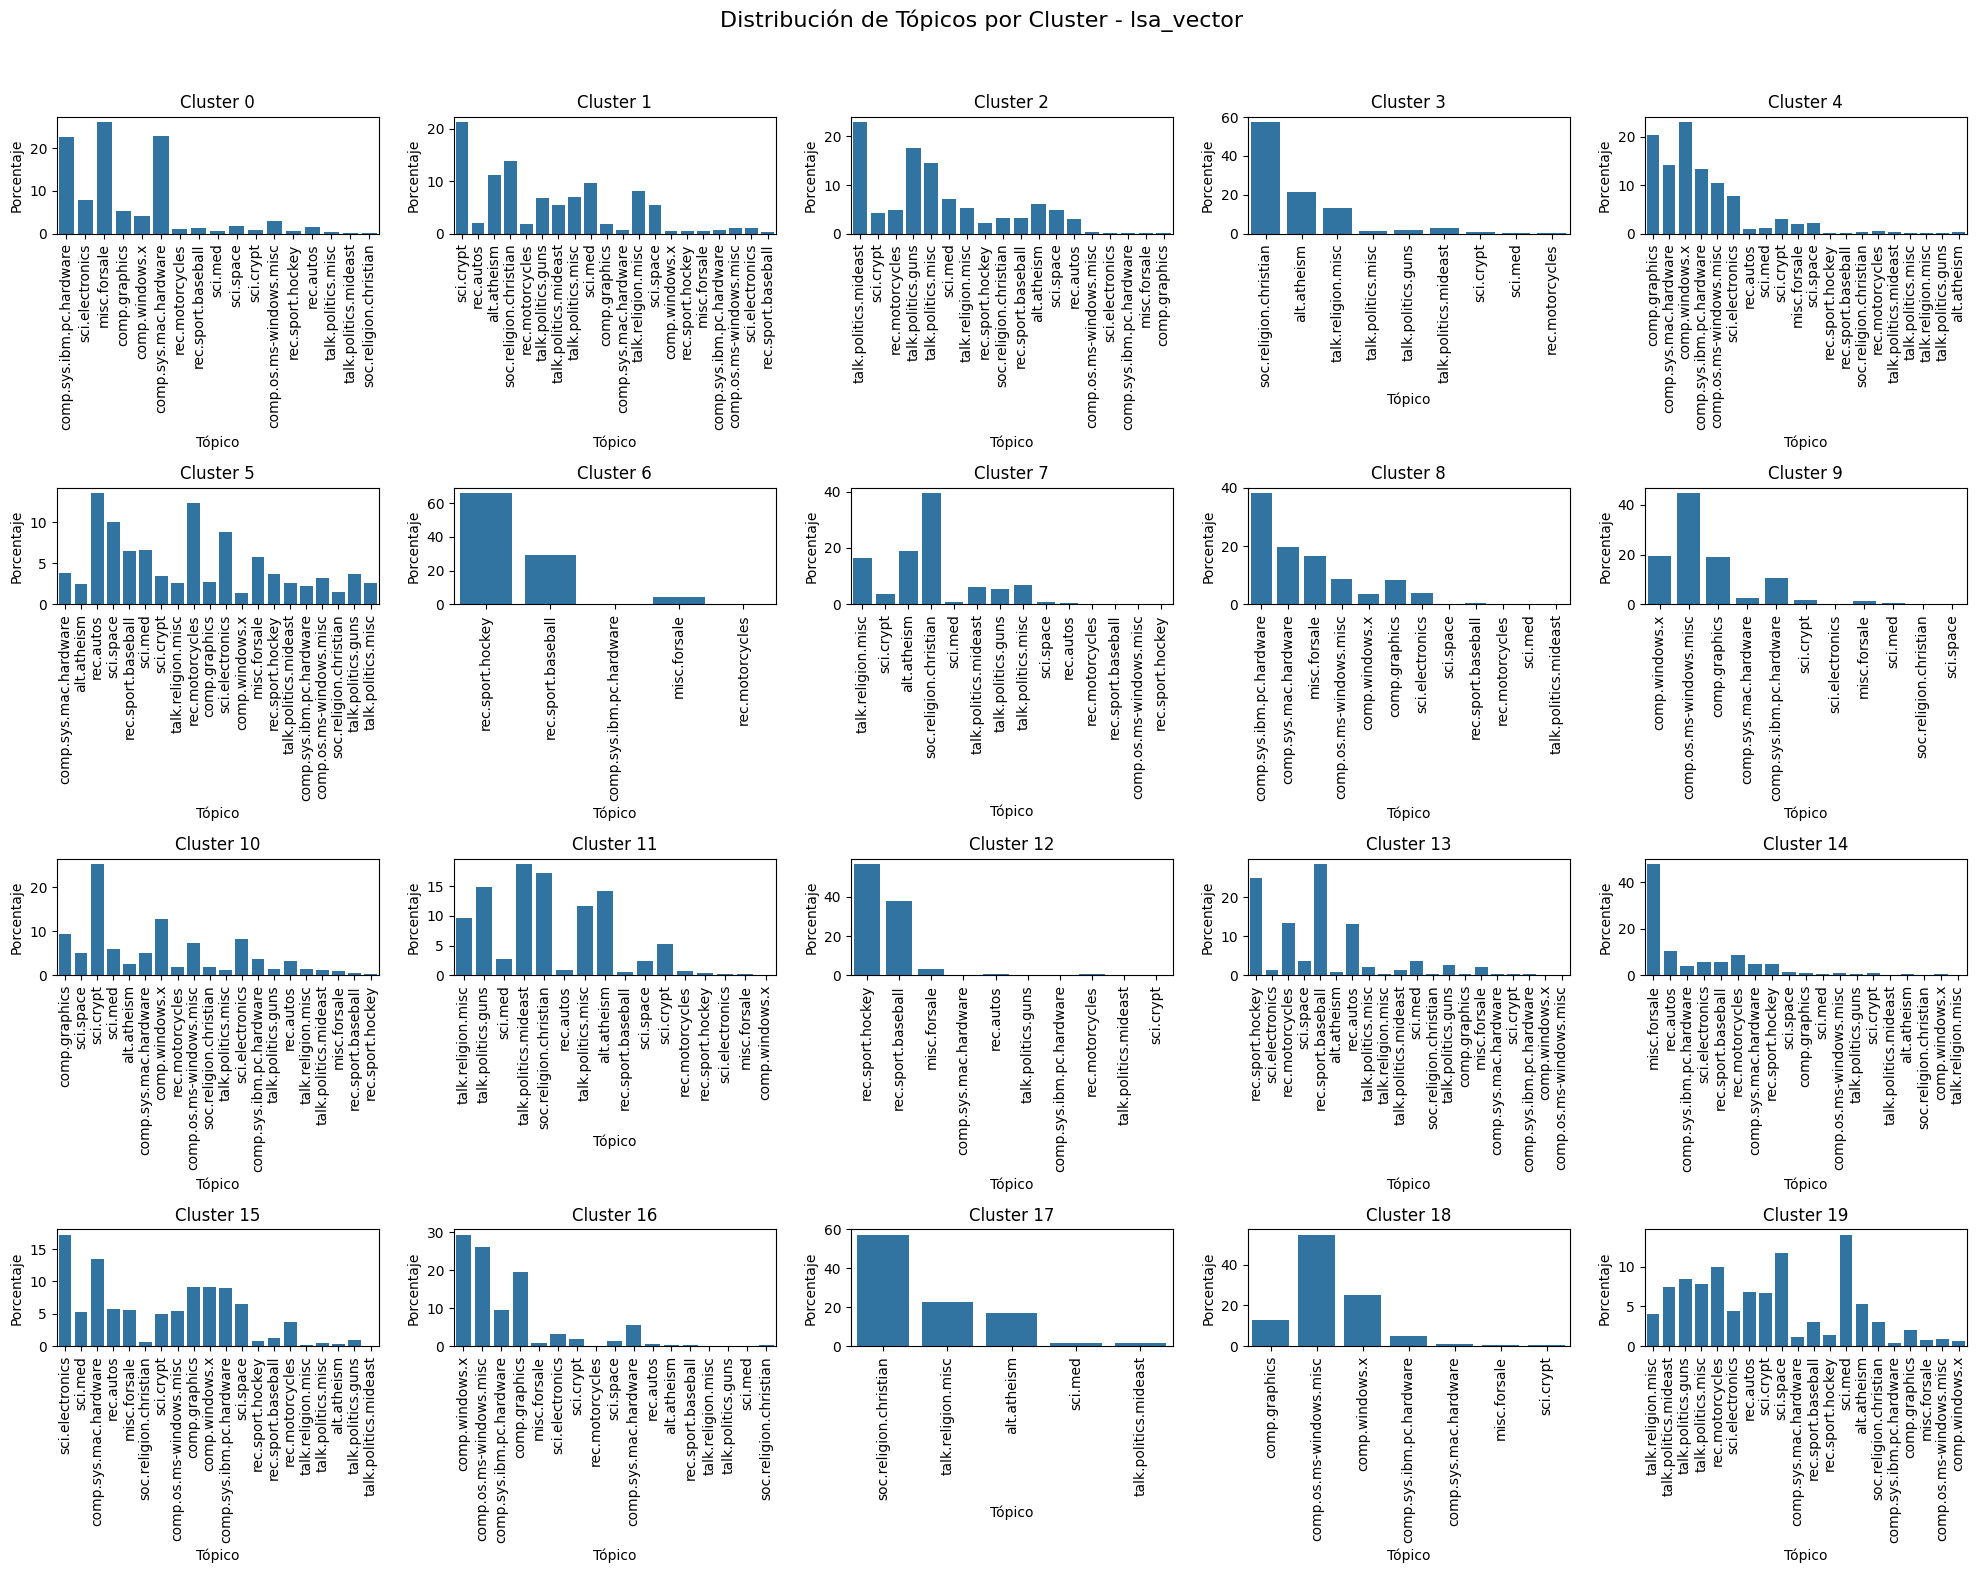

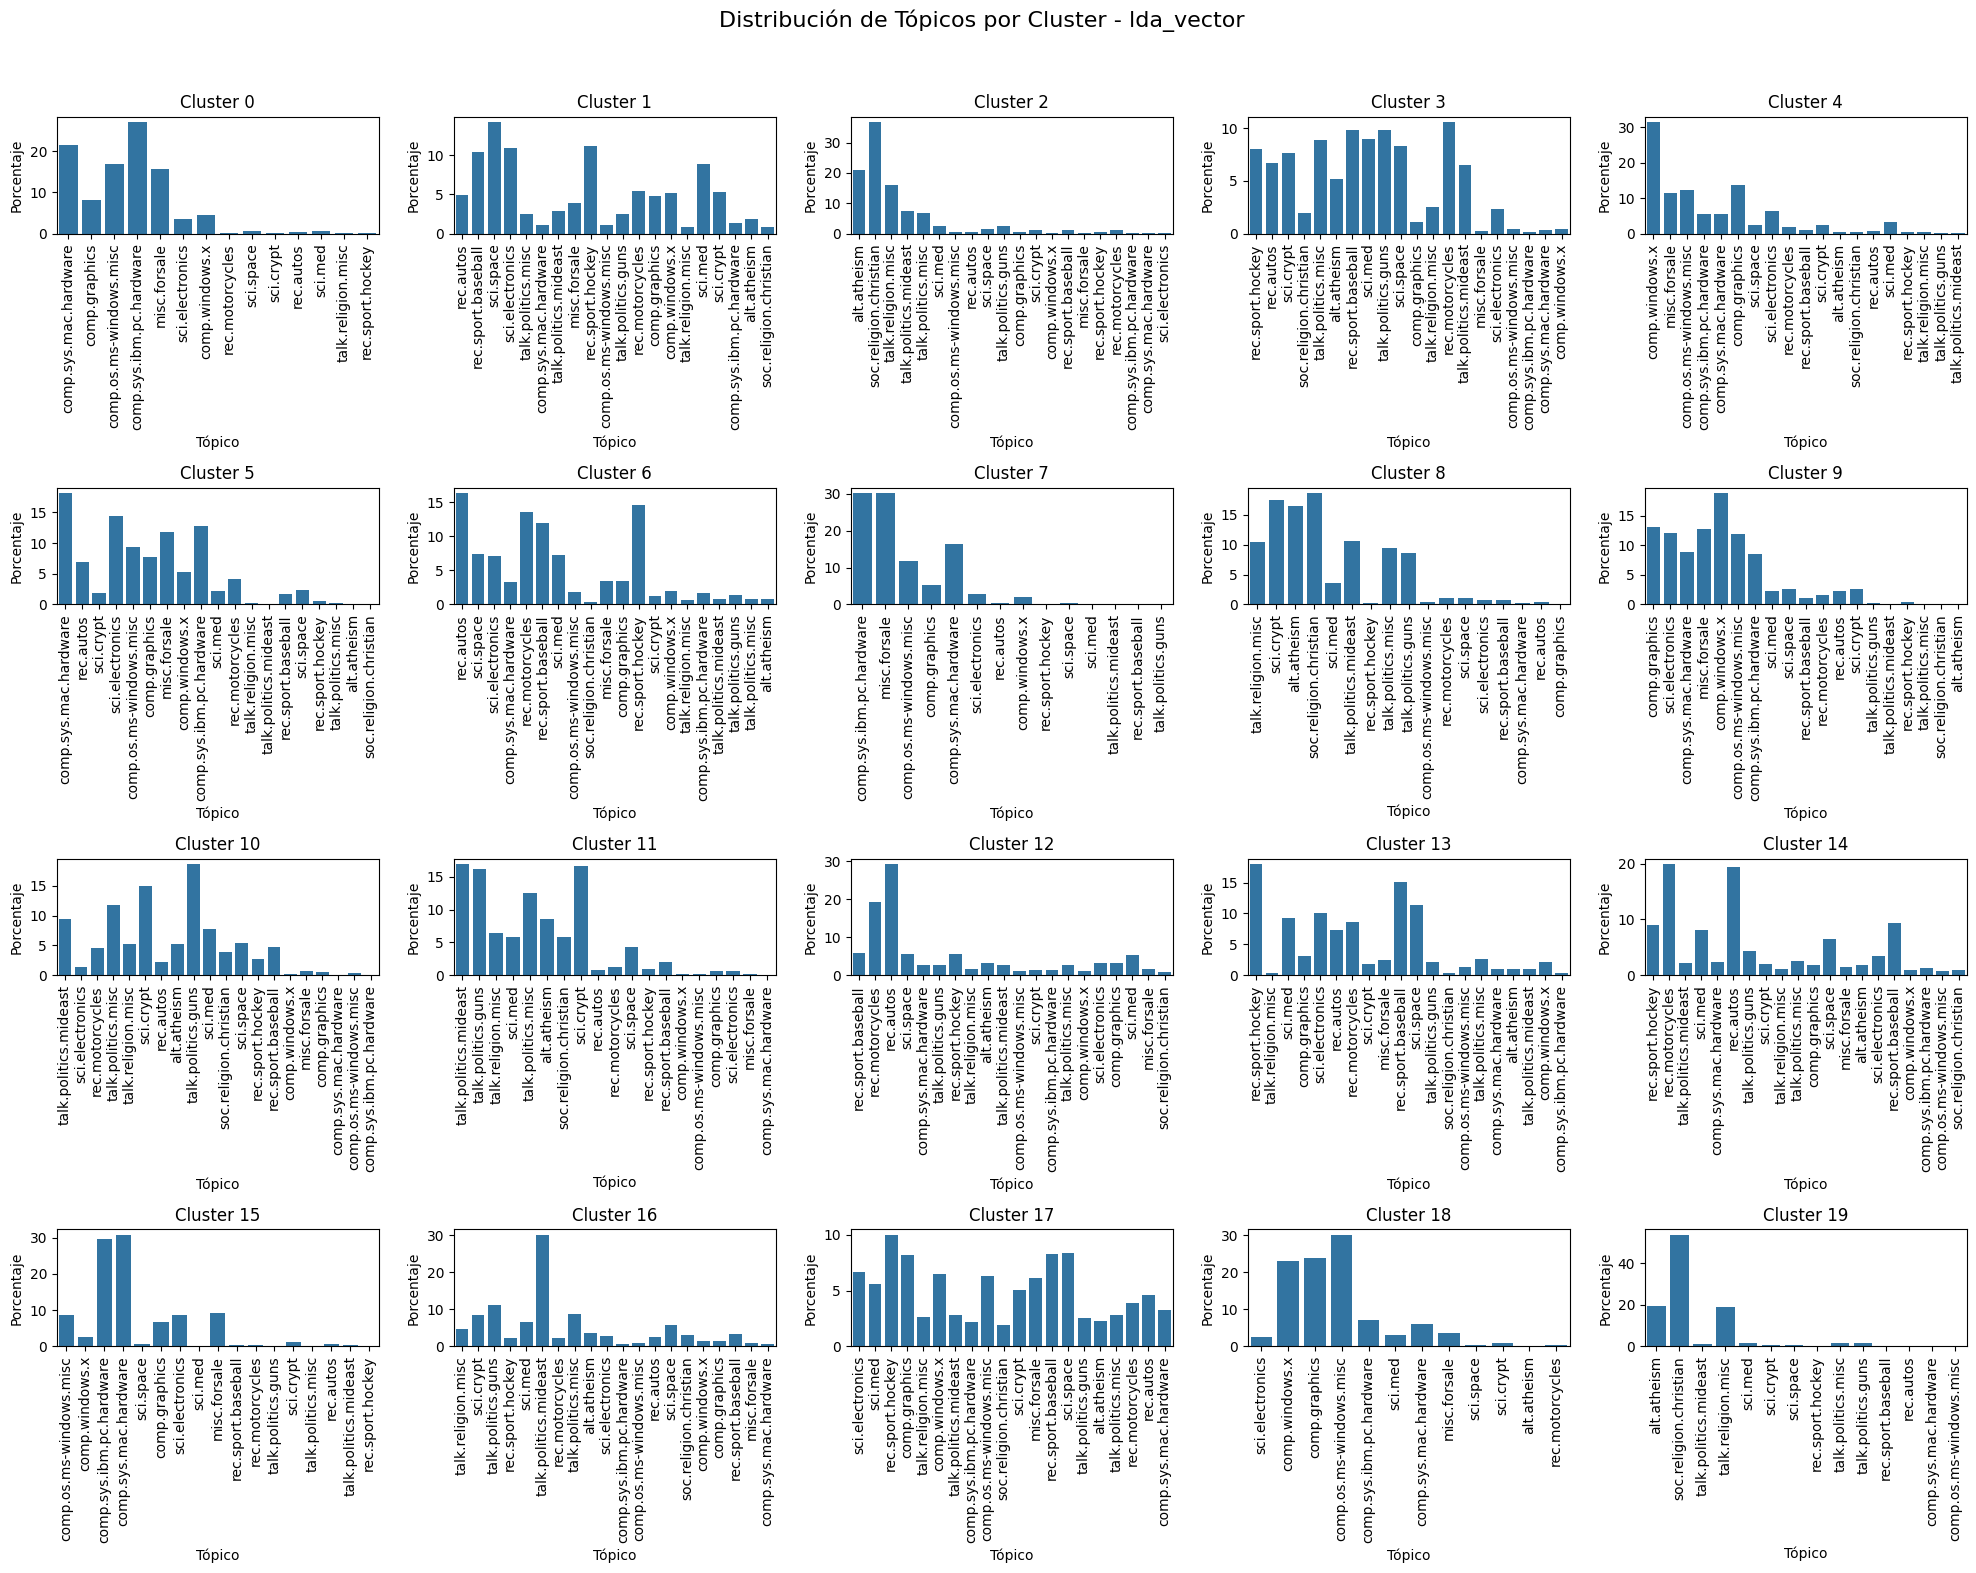

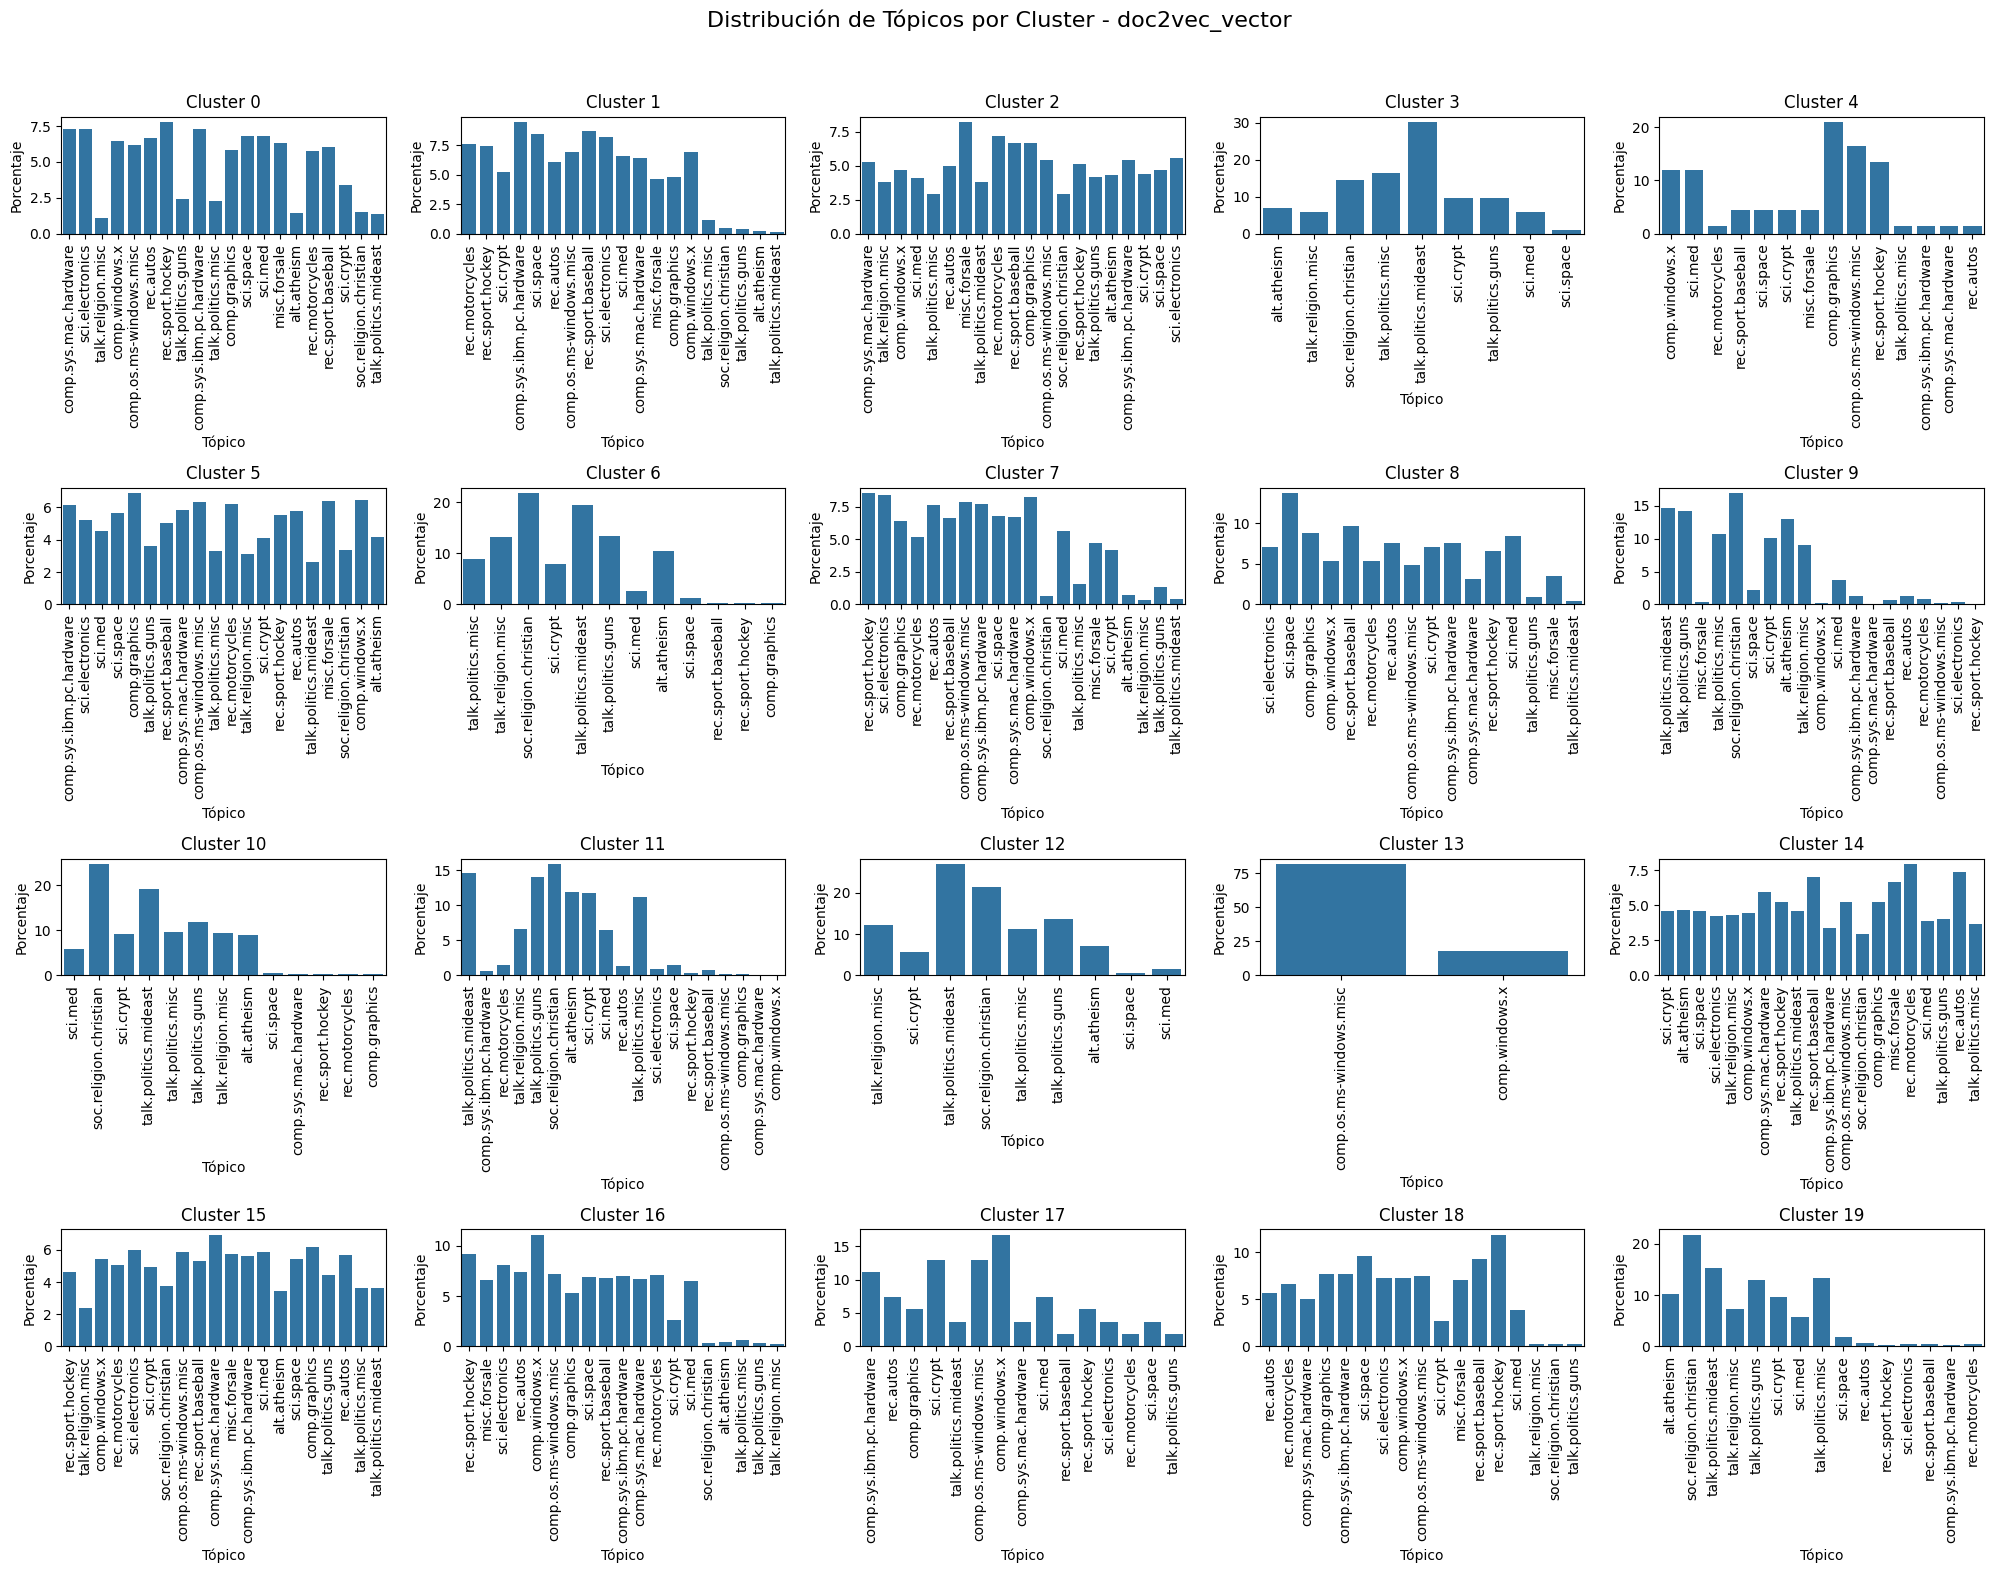

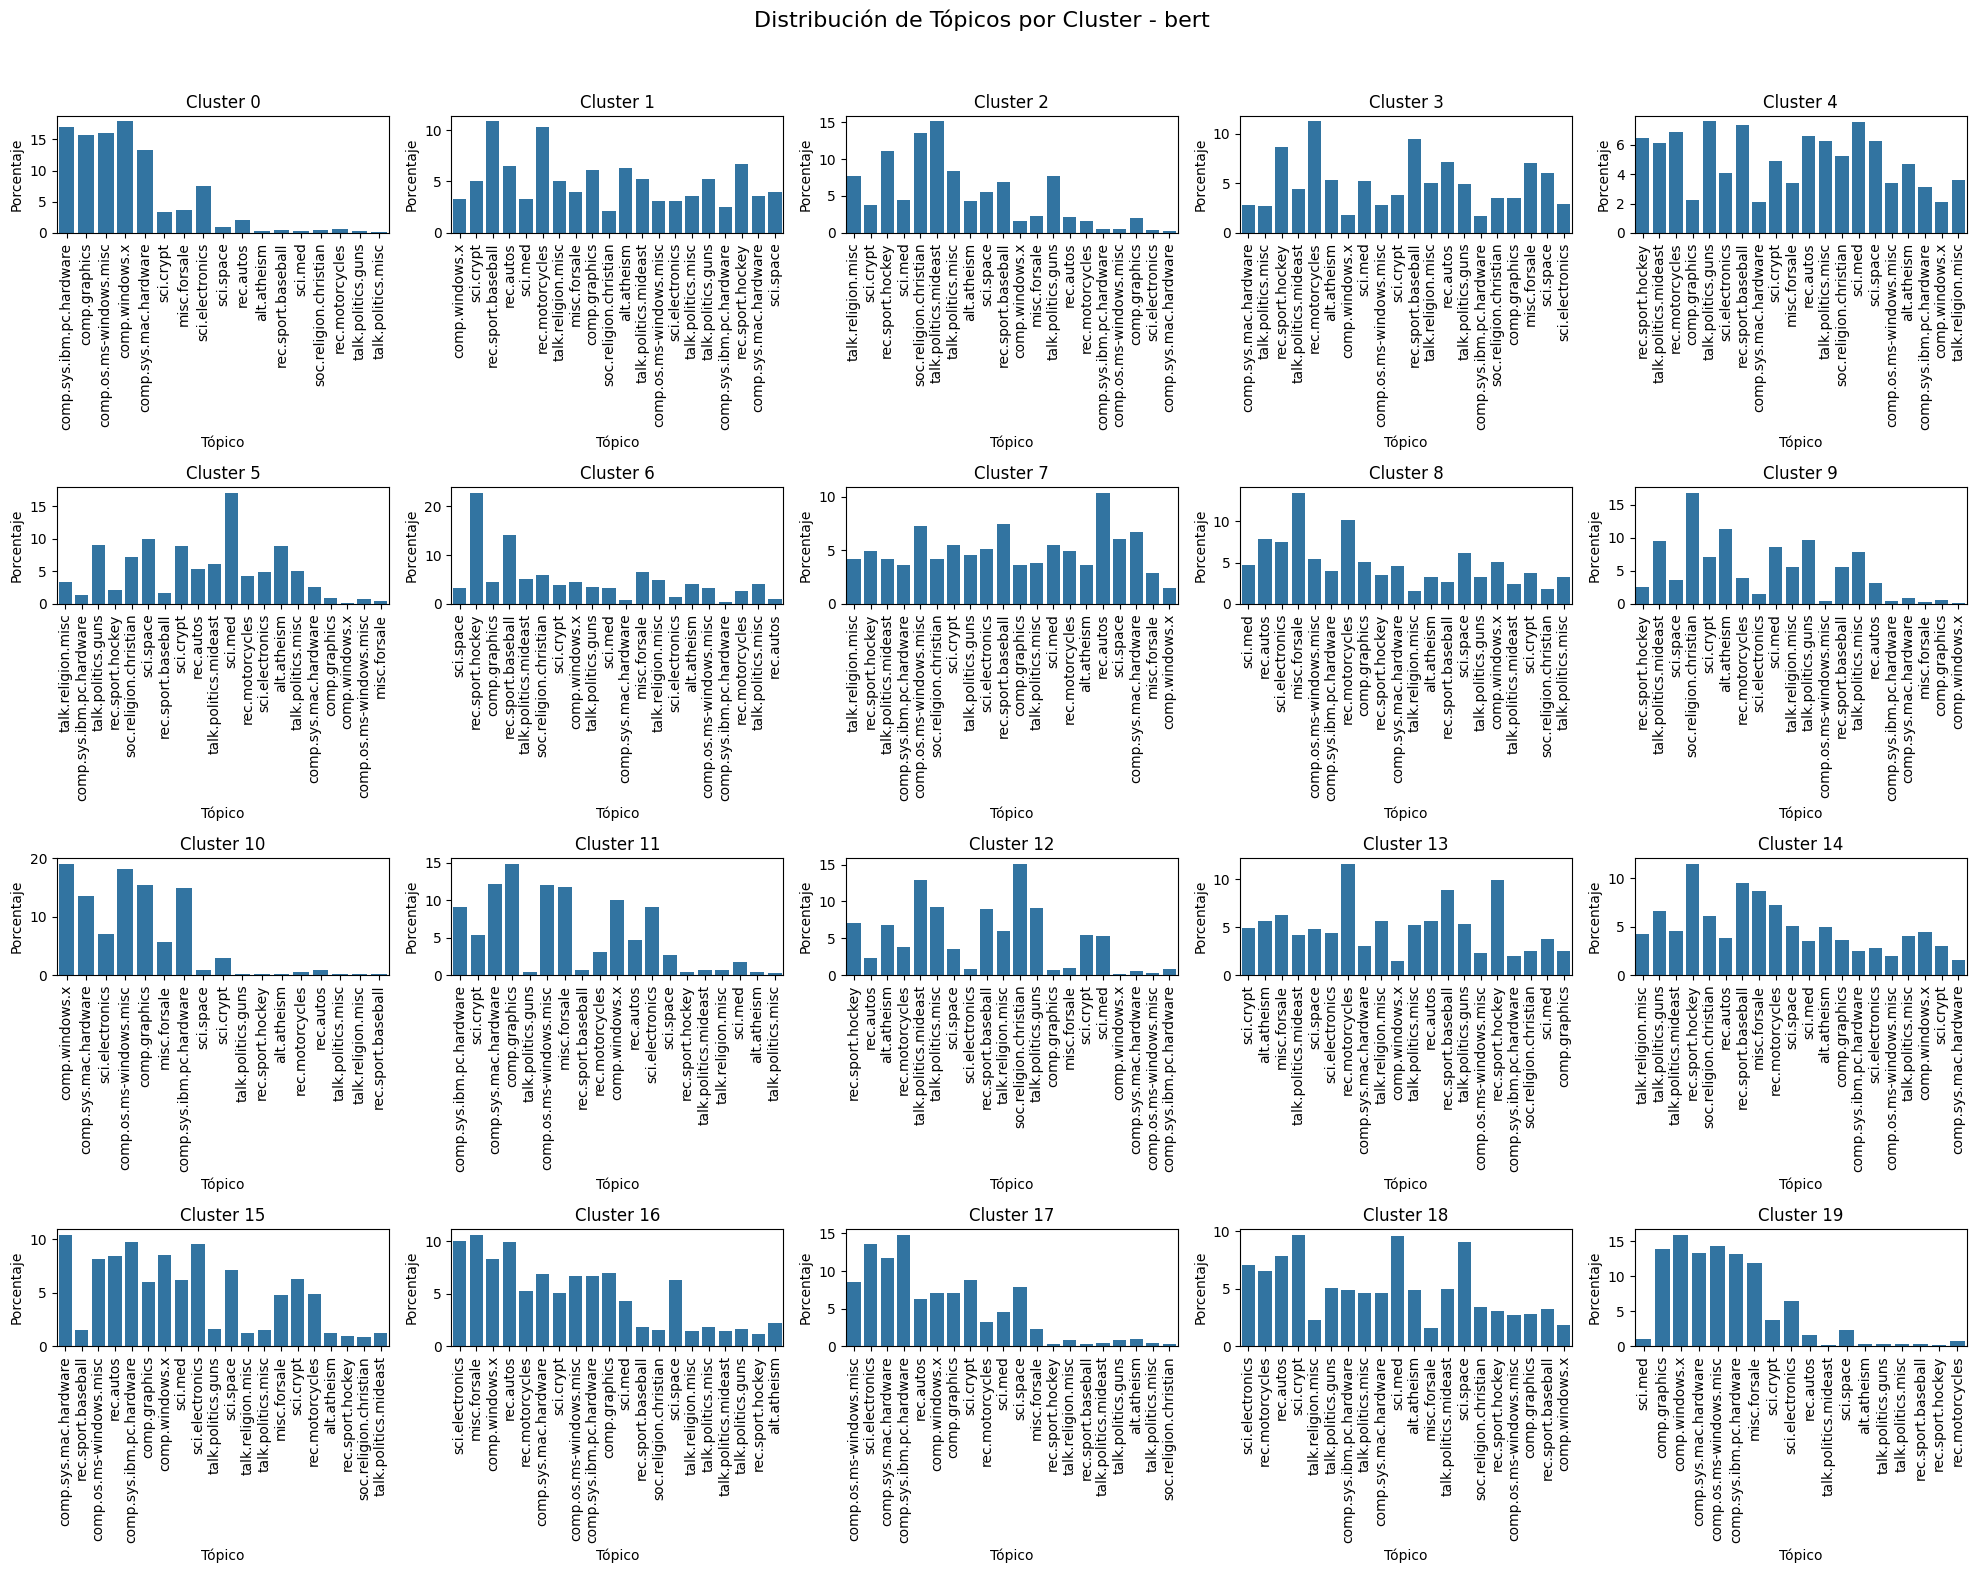

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Función para plotear los histogramas de porcentaje de tópicos para cada cluster en cada método
def plot_histogramas_porcentaje_topicos(df_cluster, title):
    num_clusters = len(df_cluster)
    fig, axs = plt.subplots(4, 5, figsize=(20, 16))  # Crear una matriz de gráficos de 4x5 (para 20 clusters)
    axs = axs.ravel()  # Aplanar la matriz de subplots para iterar fácilmente

    # Iterar por cada cluster y crear un histograma
    for i, row in df_cluster.iterrows():
        porcentaje_topicos = row['porcentaje_topicos']

        # Crear el histograma
        sns.barplot(x=list(porcentaje_topicos.keys()), y=list(porcentaje_topicos.values()), ax=axs[i])
        axs[i].set_title(f"Cluster {row['cluster']}")
        axs[i].set_ylabel('Porcentaje')
        axs[i].set_xlabel('Tópico')
        axs[i].tick_params(axis='x', rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad

    plt.suptitle(f"Distribución de Tópicos por Cluster - {title}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar el layout para evitar que el título se superponga
    plt.show()

# Generar la matriz de histogramas para cada método
for column in vector_columns:
    plot_histogramas_porcentaje_topicos(df_clusters[column], column)


#Pureza  y matrices de confusión

La pureza de un cluster se define como el porcentaje de los puntos en ese cluster que pertenecen al tópico mayoritario (más frecuente) en ese cluster.
Calcular la pureza por cluster: Para cada cluster, calculamos la frecuencia de los tópicos y seleccionamos el más frecuente.
Calcular la pureza global: La pureza total del clustering es la suma ponderada de las purezas de todos los clusters.





In [ ]:
from collections import Counter
import numpy as np

# Función para calcular la pureza de cada cluster
def calcular_pureza_cluster(topicos_cluster):
    conteo_topicos = Counter(topicos_cluster)
    topico_predominante = max(conteo_topicos.values())
    pureza = topico_predominante / len(topicos_cluster)
    return pureza

# Función para calcular la pureza general para una columna de clusters en el DataFrame
def calcular_pureza_general(df, cluster_col, topic_col='topic'):
    purezas = []

    # Iterar por cada cluster único en la columna
    for cluster in df[cluster_col].unique():
        # Filtrar los tópicos que pertenecen a este cluster
        topicos_cluster = df[df[cluster_col] == cluster][topic_col].values

        # Calcular la pureza para este cluster
        pureza = calcular_pureza_cluster(topicos_cluster)
        purezas.append(pureza)

    # Calcular la pureza promedio de todos los clusters
    pureza_general = np.mean(purezas)
    return pureza_general, purezas

# Calcular la pureza para cada conjunto de clusters en el DataFrame
resultados_pureza = {}

for column in [col for col in df_newsgroups.columns if col.startswith('cluster_')]:
    pureza_general, purezas_cluster = calcular_pureza_general(df_newsgroups, column)
    resultados_pureza[column] = {
        'pureza_general': pureza_general,
        'purezas_cluster': purezas_cluster
    }

# Ver resultados para 'cluster_tfidf' como ejemplo
print("Pureza general para cluster_tfidf:", resultados_pureza['cluster_tfidf']['pureza_general'])
print("Purezas por cluster para cluster_tfidf:", resultados_pureza['cluster_tfidf']['purezas_cluster'])


Pureza general para cluster_tfidf: 0.7911926417449764
Purezas por cluster para cluster_tfidf: [0.0699030490375158, 0.3890362511052166, 1.0, 0.5796045785639958, 0.3469119579500657, 0.8768472906403941, 0.9861111111111112, 0.4, 0.9597523219814241, 0.3333333333333333, 1.0, 0.8823529411764706, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
print(df_newsgroups.columns)


Index(['text', 'label', 'topic', 'data_str', 'tfidf_vector', 'lsa_vector',
       'lda_vector', 'doc2vec_vector', 'bert', 'cluster_tfidf', 'cluster_lsa',
       'clusters_lda', 'clusters_doc2vec', 'cluster_bert'],
      dtype='object')


In [ ]:
# Definir las columnas de clusters que queremos analizar
cluster_columns = ['clusters_lda', 'cluster_lsa', 'clusters_doc2vec', 'cluster_bert']

# Calcular la pureza y mostrar los resultados para cada columna de cluster específica
for column in cluster_columns:
    pureza_general, purezas_cluster = calcular_pureza_general(df_newsgroups, column)

    print(f"Resultados para {column}:")
    print(f"  Pureza general: {pureza_general:.2f}")
    print(f"  Purezas por cluster: {purezas_cluster}\n")


Resultados para clusters_lda:
  Pureza general: 0.28
  Purezas por cluster: [0.13556174558960074, 0.36348684210526316, 0.13195020746887967, 0.1052335396736072, 0.22063492063492063, 0.16666666666666666, 0.2658898305084746, 0.341842397336293, 0.3247422680412371, 0.3486033519553073, 0.56, 0.5066079295154186, 0.313915857605178, 0.32226322263222634, 0.15873015873015872, 0.2773109243697479, 0.1954674220963173, 0.25980392156862747, 0.18, 0.33175355450236965]

Resultados para cluster_lsa:
  Pureza general: 0.53
  Purezas por cluster: [0.17219436945622832, 0.4161849710982659, 1.0, 0.46359223300970875, 0.18525449101796407, 0.6526315789473685, 0.6333333333333333, 0.162190906673757, 0.35516969218626676, 0.8257080610021786, 0.5010799136069114, 0.9827586206896551, 0.8050420168067227, 0.16312056737588654, 0.8722222222222222, 0.463302752293578, 0.348780487804878, 0.15517241379310345, 0.5122615803814714, 0.9861111111111112]

Resultados para clusters_doc2vec:
  Pureza general: 0.47
  Purezas por cluster

In [ ]:
import pandas as pd

# Datos de pureza general por cluster
data = {
    'Método': ['TF-IDF', 'LDA', 'LSA', 'Doc2Vec', 'BERT'],
    'Pureza General': [0.7912, 0.28, 0.53, 0.47, 0.21],
    'Purezas por Cluster': [
        [
    0.0699, 0.3890, 1.0, 0.5796, 0.3469, 0.8768, 0.9861, 0.4, 0.9598, 0.3333,
    1.0, 0.8824, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0
],
        [0.1356, 0.3635, 0.132, 0.1052, 0.2206, 0.1667, 0.2659, 0.3418, 0.3247, 0.3486, 0.56, 0.5066, 0.3139, 0.3223, 0.1587, 0.2773, 0.1955, 0.2598, 0.18, 0.3318],
        [0.1722, 0.4162, 1.0, 0.4636, 0.1853, 0.6526, 0.6333, 0.1622, 0.3552, 0.8257, 0.5011, 0.9828, 0.8050, 0.1631, 0.8722, 0.4633, 0.3488, 0.1552, 0.5123, 0.9861],
        [0.0905, 0.0713, 0.2526, 0.0654, 0.0653, 0.0807, 0.5556, 0.4013, 0.2028, 0.1439, 0.6882, 0.1353, 0.5853, 0.9737, 1.0, 0.9701, 0.5932, 1.0, 1.0, 0.5610],
        [0.5062, 0.1732, 0.1627, 0.3533, 0.1337, 0.2307, 0.1032, 0.1025, 0.1893, 0.2512, 0.1447, 0.2860, 0.1307, 0.1114, 0.1373, 0.2238, 0.5101, 0.1228, 0.1353, 0.1014]
    ]
}

# Crear el DataFrame con formato adecuado
df_pureza = pd.DataFrame(data)


# Mostrar la tabla de resultados actualizada
df_pureza


Método  Pureza General                                Purezas por Cluster
0   TF-IDF          0.7912  [0.0699, 0.389, 1.0, 0.5796, 0.3469, 0.8768, 0...
1      LDA          0.2800  [0.1356, 0.3635, 0.132, 0.1052, 0.2206, 0.1667...
2      LSA          0.5300  [0.1722, 0.4162, 1.0, 0.4636, 0.1853, 0.6526, ...
3  Doc2Vec          0.4700  [0.0905, 0.0713, 0.2526, 0.0654, 0.0653, 0.080...
4     BERT          0.2100  [0.5062, 0.1732, 0.1627, 0.3533, 0.1337, 0.230...

In [ ]:
df_newsgroups.columns

Index(['text', 'label', 'topic', 'data_str', 'tfidf_vector', 'lsa_vector',
       'bert', 'lda_vector', 'doc2vec_vector', 'cluster_tfidf', 'cluster_lsa',
       'clusters_lda', 'clusters_doc2vec', 'cluster_bert'],
      dtype='object')

In [ ]:
# Renombrar columnas para que sigan el mismo patrón 'cluster_{column}'
df_newsgroups.rename(columns={
    'clusters_lda': 'cluster_lda',
    'clusters_doc2vec': 'cluster_doc2vec'
}, inplace=True)


Descripción de cada métrica:
Adjusted Rand Index (ARI): Evalúa la similitud entre las asignaciones de clusters y las etiquetas de verdad (tópicos originales). Un valor de 1 indica un ajuste perfecto, mientras que un valor de 0 indica que no hay relación entre clusters y tópicos originales.

Normalized Mutual Information (NMI): Mide la cantidad de información mutua entre los clusters y los tópicos originales. También va de 0 a 1, donde 1 significa que las etiquetas y clusters son perfectamente concordantes.

Fowlkes-Mallows Index (FMI): Evalúa la precisión de la correspondencia entre los clusters generados y los tópicos originales, también en una escala de 0 a 1.

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score
import pandas as pd

# Crear un DataFrame vacío para almacenar los resultados de coherencia
coherence_results = pd.DataFrame(columns=["Embedding", "ARI", "NMI", "Homogeneity"])

# Lista de columnas de clustering
cluster_columns = ['cluster_tfidf', 'cluster_lsa', 'cluster_lda', 'cluster_doc2vec', 'cluster_bert']

# Iterar sobre cada columna de clusters
for column in cluster_columns:
    print(f"Procesando coherencia para {column}...")  # Verificar que se itere por todas las columnas

    # Verificar si la columna existe en el DataFrame
    if column in df_newsgroups.columns:
        # Calcular métricas de coherencia
        ari = adjusted_rand_score(df_newsgroups['topic'], df_newsgroups[column])
        nmi = normalized_mutual_info_score(df_newsgroups['topic'], df_newsgroups[column])
        homogeneity = homogeneity_score(df_newsgroups['topic'], df_newsgroups[column])

        # Guardar los resultados en el DataFrame
        coherence_results = pd.concat([coherence_results, pd.DataFrame({
            "Embedding": [column],
            "ARI": [ari],
            "NMI": [nmi],
            "Homogeneity": [homogeneity]
        })], ignore_index=True)
    else:
        print(f"Columna {column} no encontrada en el DataFrame.")

# Mostrar los resultados
print(coherence_results)



Procesando coherencia para cluster_tfidf...
Procesando coherencia para cluster_lsa...


<ipython-input-84-7a71c2cdd5c1>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  coherence_results = pd.concat([coherence_results, pd.DataFrame({


Procesando coherencia para cluster_lda...
Procesando coherencia para cluster_doc2vec...
Procesando coherencia para cluster_bert...
         Embedding       ARI       NMI  Homogeneity
0    cluster_tfidf  0.037829  0.235342     0.157592
1      cluster_lsa  0.100136  0.320137     0.284625
2      cluster_lda  0.150923  0.318629     0.316517
3  cluster_doc2vec  0.011075  0.106218     0.090614
4     cluster_bert  0.075800  0.201581     0.200313


In [ ]:
coherence_results[:5]

Embedding       ARI       NMI  Homogeneity
0    cluster_tfidf  0.037829  0.235342     0.157592
1      cluster_lsa  0.100136  0.320137     0.284625
2      cluster_lda  0.150923  0.318629     0.316517
3  cluster_doc2vec  0.011075  0.106218     0.090614
4     cluster_bert  0.075800  0.201581     0.200313

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Definir función para calcular la matriz de confusión entre tópicos originales y clusters generados
def calcular_matriz_confusion(topicos, clusters):
    return pd.DataFrame(confusion_matrix(topicos, clusters))

# Codificar los tópicos en valores numéricos para evitar el problema de mezcla de tipos
label_encoder = LabelEncoder()
topicos_codificados = label_encoder.fit_transform(df_newsgroups['topic'])

# Crear un diccionario para almacenar las matrices de confusión
matrices_confusion = {}

# Iterar sobre cada columna de embeddings y calcular la matriz de confusión
for column in vector_columns:
    # Convertir la columna en un array de NumPy
    data = np.array(df_newsgroups[column].tolist())

    # Aplicar PCA para reducir a 2 dimensiones (para K-means de forma coherente con visualización previa)
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)

    # Aplicar K-Means con 20 clusters
    kmeans = KMeans(n_clusters=20, random_state=42)
    clusters = kmeans.fit_predict(reduced_data)

    # Calcular matriz de confusión entre los tópicos originales (codificados) y los clusters generados
    matriz_confusion = calcular_matriz_confusion(topicos_codificados, clusters)

    # Guardar la matriz en el diccionario con el nombre del embedding
    matrices_confusion[column] = matriz_confusion

# Mostrar las matrices de confusión para cada embedding
for column, matriz in matrices_confusion.items():
    print(f"\nMatriz de Confusión para {column}:\n")
    display(matriz)




Matriz de Confusión para tfidf_vector:



0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0     4   89   85    0    0   42  138    9    3   15    0    0    0    0  138   
1   235   46    0   43    0    0    2    4  155   41   58  113   46    0    0   
2   173   18    0  174    0    0    1    2   79   19   69  224   31    0    0   
3   126   13    0   25    1    0    1    2  205    2  144   45  230    1    0   
4   130   21    0    3    0    0    1    6  261    8   61    8  168    1    0   
5   312   13    0   77    0    0    1    2  153   24   21  156   19    0    1   
6    13   26    0    1   12    0    2   39  121    2   55    1  176   16    1   
7     9  195    2    0    0    0   21  136   48    4    0    1    8    4    2   
8     5  276    2    0    1    0   33  146   26    3    0    0    3    2    1   
9     0   84    0    0   80    0   10  299   16    2    1    1    9  228    3   
10    1   40    0    0  181    0    4  237    7    1    0    0    2  344    5   
11   40  123    7    3    0    0   70    4   23  178    2    7    3    1   53   
12   56  109    0    0    0    0    4   21  181   13    9   13   42    0    1   
13    9  275    2    1    0    2   57   55   39    9    0    1    0    0   22   
14   19  295    1    0    0    0   41   36   45    8    2    3    4    0   13   
15    3   52  214    0    0  116  138    1    4   31    1    2    0    0  244   
16    2  167   15    0    0    0  210   22    4    6    0    1    0    2   93   
17    1  136   22    0    0    2  278   13    3    8    1    0    0    1   92   
18    1  150   22    0    0    0  161   17    4    8    0    0    2    0   65   
19    1   86   75    0    0   45  102    5    3    6    0    1    0    0   94   

     15   16   17   18   19  
0     0  146   18   60   52  
1     5   12  119   90    4  
2     6   16   74   96    3  
3    27    7   74   79    0  
4    37    9  121  128    0  
5     3    6  151   49    0  
6   285   11   31  180    3  
7    37   42   73  350   58  
8    42   54   52  278   72  
9    25   16   11  131   78  
10   24    6    8   85   54  
11    4  194  148   93   38  
12   28   22  207  269    9  
13    1  190  106  139   82  
14    5  116  115  227   57  
15    1  104   16   38   32  
16    3  123   21   81  160  
17    0   82    8   59  234  
18    0  125    9   55  156  
19    0  102   10   53   45


Matriz de Confusión para lsa_vector:



0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0     0  115   88   55    3   70    0  110    0    0   20  159    0    8    3   
1    41   19    2    0  234   78    0    0   50   95   74    0    0    4    7   
2    22   12    5    0  119   89    0    1   52  223   58    0    0    1    6   
3   175    7    1    0  153   64    1    0  229   53   29    0    1    3   25   
4   177    7    0    0  164  109    0    0  118   12   39    0    1    4   30   
5    31    5    0    0  264   39    0    0   21   97  100    1    0    2    4   
6   201    6    3    0   23  164   11    0   99    6    7    2   18   22  288   
7    12   21   43    0   12  381    0    2    0    0   25   10    5  137   63   
8     8   18   70    1    6  349    1    1    1    0   15    9    3  140   52   
9    11    4   47    0    2  184   77    1    3    0    4    7  222  295   35   
10    5    6   30    0    1  105  174    1    0    0    3    5  332  258   30   
11    6  220   62    2   34   99    0   21    0    8  197   60    1    3    6   
12   61   12    3    0   89  249    0    0   23    1   64    2    0   15   34   
13    4  101  103    1   14  188    0    5    1    2   46   30    0   38    4   
14   13   56   71    0   24  281    0    5    2    1   40   28    0   37    9   
15    1  144   46  146    4   43    0  228    0    1   15  193    0    3    1   
16    0   71  253    5    1  105    0   32    0    0   12  166    1   27    3   
17    1   56  330    8    3   75    0   36    1    0   10  210    1   13    1   
18    3   73  209    4    1   72    0   40    0    0   10  131    0   23    0   
19    0   85   75   33    1   73    0   96    0    0   12  108    0    4    1   

     15   16  17  18   19  
0     6    2  24   0  136  
1   156  139   0  23   51  
2    93  185   0  97   22  
3   154   68   0   9   10  
4   231   40   0   2   29  
5   156  207   0  45   16  
6    97    6   0   1   21  
7    99    4   0   0  176  
8    65    1   0   0  256  
9    21    2   0   0   79  
10   13    0   0   0   36  
11   85   14   0   1  172  
12  294   23   0   0  114  
13   91    1   2   0  359  
14  111    9   0   0  300  
15   11    3  80   0   78  
16   16    1   0   0  217  
17    1    0   2   0  192  
18    9    0   0   0  200  
19    3    1  32   0  104


Matriz de Confusión para lda_vector:



0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0     0   22  160   58    3    1    9    0  148    1   65  102   13   14   21   
1    70   55    3   12  125   64   41   32    1  113    7    7   14   42   21   
2   144   12    4    5  112   78   22   71    3  103    4    3    5   18    9   
3   229   16    1    2   50  106   20  183    0   74    1    0    6    4   14   
4   183   12    1    4   51  150   39   99    2   76    1    1   11   13   27   
5    39   60    1    5  285   44   24   13    0  162    3    2    5   29   10   
6   133   45    1    3  105   98   41  183    0  110    9    2    7   34   16   
7     3   57    3   75    6   57  193    2    4   20   29    9  122   98  214   
8     2   63    8  118   17   34  161    0    9   14   57   15   80  115  219   
9     0  119   10  110    8   14  142    1    6   10   59   24   24  200  104   
10    1  129    4   90    3    5  172    1    2    4   34   12   23  239   99   
11    1   61    9   86   23   15   15    0  157   22  188  196    6   24   22   
12   31  125    1   26   58  119   84   17    6  104   17    7   13  135   39   
13    5  102   20  100   29   18   86    1   32   20   98   69   22  124   89   
14    5  163   11   93   22   19   87    2    9   23   68   51   23  151   71   
15    0    9  281   22    4    1    5    0  167    1   50   69    4    6   10   
16    0   28   18  110    2    0   17    1   78    2  234  191   11   28   48   
17    0   33   56   73    2    1    9    1   96    1  119  200   11   14   25   
18    0   28   51   99    0    2   10    0   85    1  149  148   11   36   29   
19    1    9  124   28    3    2    8    0   94    0   66   76    7    6   13   

     15   16   17   18   19  
0     0   30   37    1  114  
1    42   11  132  181    0  
2    54    8  101  228    1  
3   184    4   35   53    0  
4   190    4   53   45    1  
5    16   11  105  174    0  
6    56    6   99   27    0  
7     3   20   74    0    1  
8     2   18   62    2    0  
9     2   26  133    0    2  
10    1   18  161    0    1  
11    7   68   81    6    4  
12   53   23  108   18    0  
13    1   53   90   23    8  
14    3   46  135    2    3  
15    0   24   31    0  313  
16    1   91   41    0    9  
17    2  245   45    0    7  
18    1   70   45    0   10  
19    0   39   43    0  109


Matriz de Confusión para doc2vec_vector:



0   1    2   3   4    5   6    7   8    9    10   11  12  13   14   15  \
0    28   2  105   7   0  111  33   11   0  120   36  102  14   0   77   91   
1   116  39  162   0  14  182   1   96  20    0    1    2   0   0   86  163   
2   123  56  132   0  11  167   0  118  11    2    0    2   0   9   86  155   
3   145  76  131   0   1  163   0  116  17   12    0    5   0   0   56  148   
4   145  52  128   0   1  154   0  101   7    1    1    1   0   0   98  182   
5   128  56  114   0   8  171   0  124  12    2    0    1   0   2   73  143   
6   125  37  199   0   3  170   0   71   8    3    0    0   0   0  110  151   
7   132  49  121   0   1  153   0  115  17   12    0   11   0   0  122  149   
8   115  61  174   0   1  165   0   78  12    8    1   13   0   0  131  133   
9   120  70  163   0   3  133   1  100  22    7    0    6   0   0  116  140   
10  154  60  124   0   9  146   1  128  15    1    1    3   0   0   86  121   
11   67  42  107  10   3  109  25   63  16   94   37  101  11   0   76  129   
12  145  66  136   0   0  138   0  126  16    3    0    8   0   0   70  157   
13  135  53  100   6   8  121   8   84  19   35   24   56   3   0   64  154   
14  135  68  114   1   3  150   4  102  31   21    2   13   1   0   76  142   
15   30   4   70  15   0   89  68   10   0  157  100  136  42   0   49   99   
16   48   3  102  10   0   95  42   20   2  132   48  120  27   0   66  116   
17   27   1   92  31   0   69  61    6   1  136   78  125  53   0   76   95   
18   45   9   70  17   1   88  28   24   0   99   39   96  22   0   60   95   
19   21   0   92   6   0   82  41    5   0   84   38   57  24   0   71   62   

     16  17  18   19  
0     4   0   0   58  
1    54   3  34    0  
2    73   7  33    0  
3    71   6  34    1  
4    68   2  22    0  
5   113   9  32    0  
6    67   0  31    0  
7    75   4  25    4  
8    72   1  29    2  
9    69   1  41    2  
10   94   3  52    1  
11   27   7  12   55  
12   83   2  32    2  
13   66   4  17   33  
14   70   2  42   10  
15    3   0   1  124  
16    3   1   1   74  
17    0   2   0   87  
18    6   0   0   76  
19    2   0   1   42


Matriz de Confusión para bert:



0   1    2   3    4    5    6   7    8    9    10  11   12  13   14   15  \
0     2  35   47  44   79   59   27  20   33  135    2   2   95  39   73   14   
1   133  34   21  29   38    6   30  20   51    7  134  67    9  17   53   70   
2   136  17    6  23   57    5   21  40   54    6  158  54    4  16   29   95   
3   145  14    5  14   53    9    3  20   40    5  129  41   11  14   36  114   
4   113  20    3  23   36   17    6  37   46   10  118  55    7  21   23  122   
5   152  18   17  15   35    1   29   8   51    1  166  45    2  10   66  100   
6    31  22   25  58   57    3   43  16  134    3   49  53   14  43  128   56   
7    17  36   23  59  111   35    7  57   78   38    7  21   33  39   57   99   
8     5  57   18  93  116   28   17  27  101   47    5  14   54  80  107   57   
9     4  60   75  78  124   11   93  41   27   66    1   3  127  61  140   18   
10    0  37  119  72  109   14  150  27   35   31    2   2  100  68  169   11   
11   29  28   41  32   82   59   25  30   37   85   26  24   77  34   44   74   
12   64  17    4  24   69   32    9  28   74   18   61  41   12  30   41  112   
13    3  18   48  43  127  113   21  30   47  103    0   8   75  26   51   72   
14    8  22   60  50  106   66   21  33   61   43    8  12   50  33   74   83   
15    4  12  146  29   88   48   39  23   18  200    0   0  213  17   89   10   
16    2  29   83  41  128   60   23  25   33  114    1   2  129  37   97   19   
17    0  29  163  37  103   41   33  23   24  113    0   3  181  29   67   14   
18    1  20   91  22  105   33   27  21   33   94    1   1  131  36   60   18   
19    0  28   83  42   61   22   32  23   15   67    1   3   85  39   62   15   

     16   17   18  19  
0    28    7   56   2  
1    89   53   32  80  
2    86   64   31  83  
3    86  111   56  76  
4    88   88   53  77  
5   106   53   21  92  
6   136   17   18  69  
7   127   47   90   9  
8    67   24   75   4  
9    24    2   37   2  
10   15    2   35   1  
11   65   66  111  22  
12  128  102   81  37  
13   55   34  110   6  
14   81   59  104  13  
15   20    2   39   0  
16   21    6   58   2  
17   19    3   57   1  
18   23    3   53   2  
19   18    6   26   0

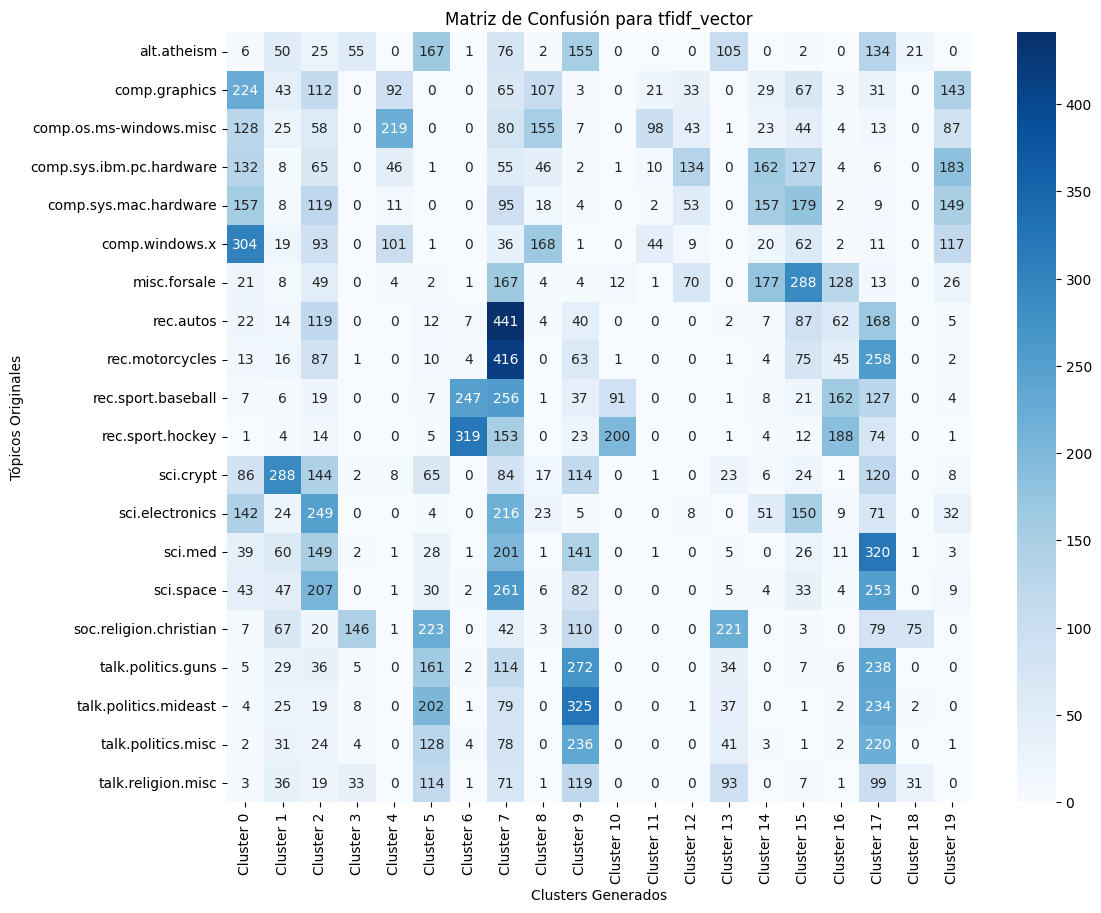

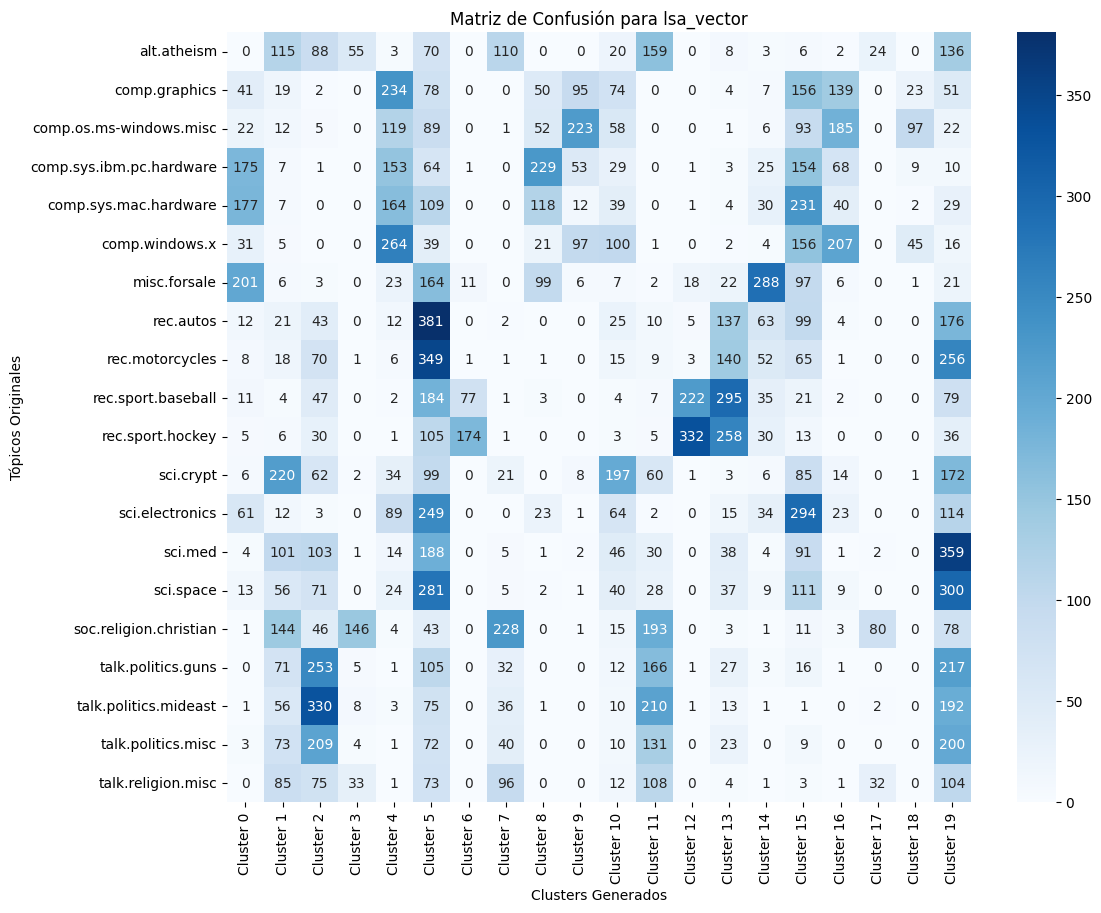

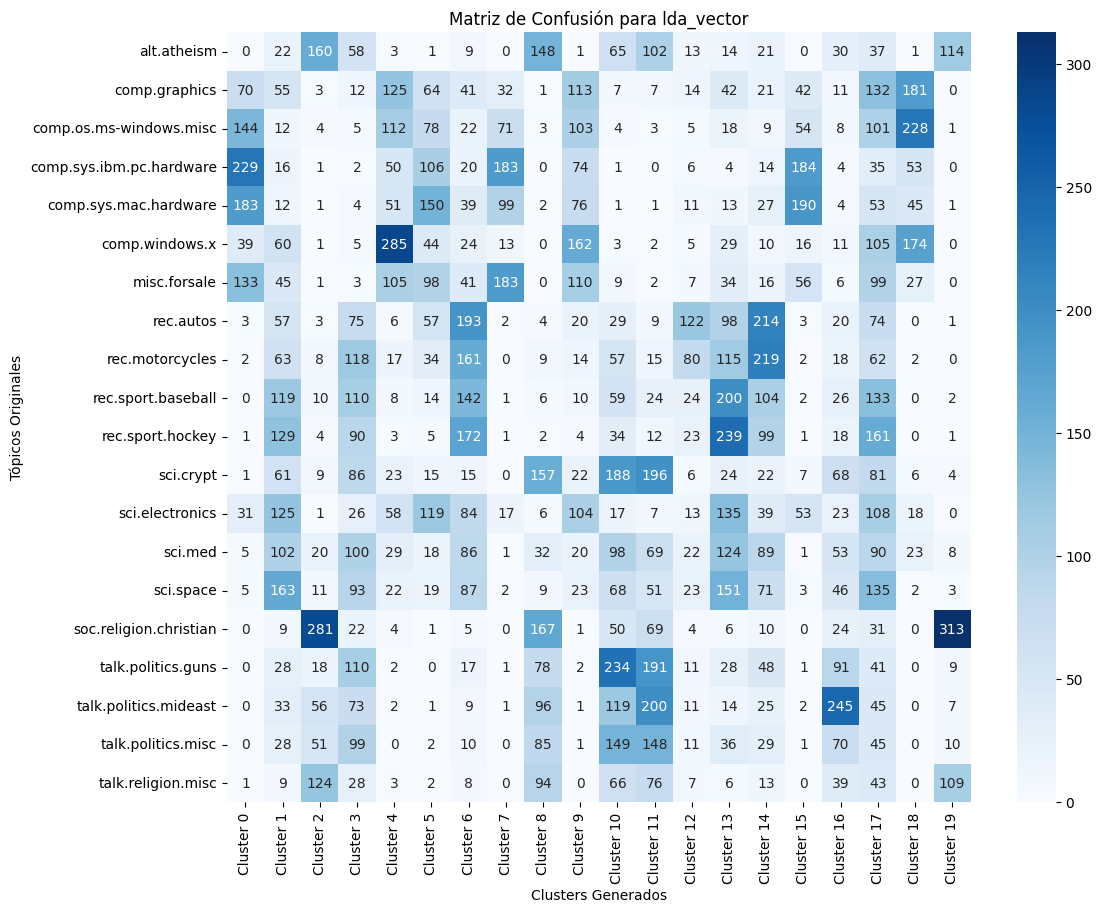

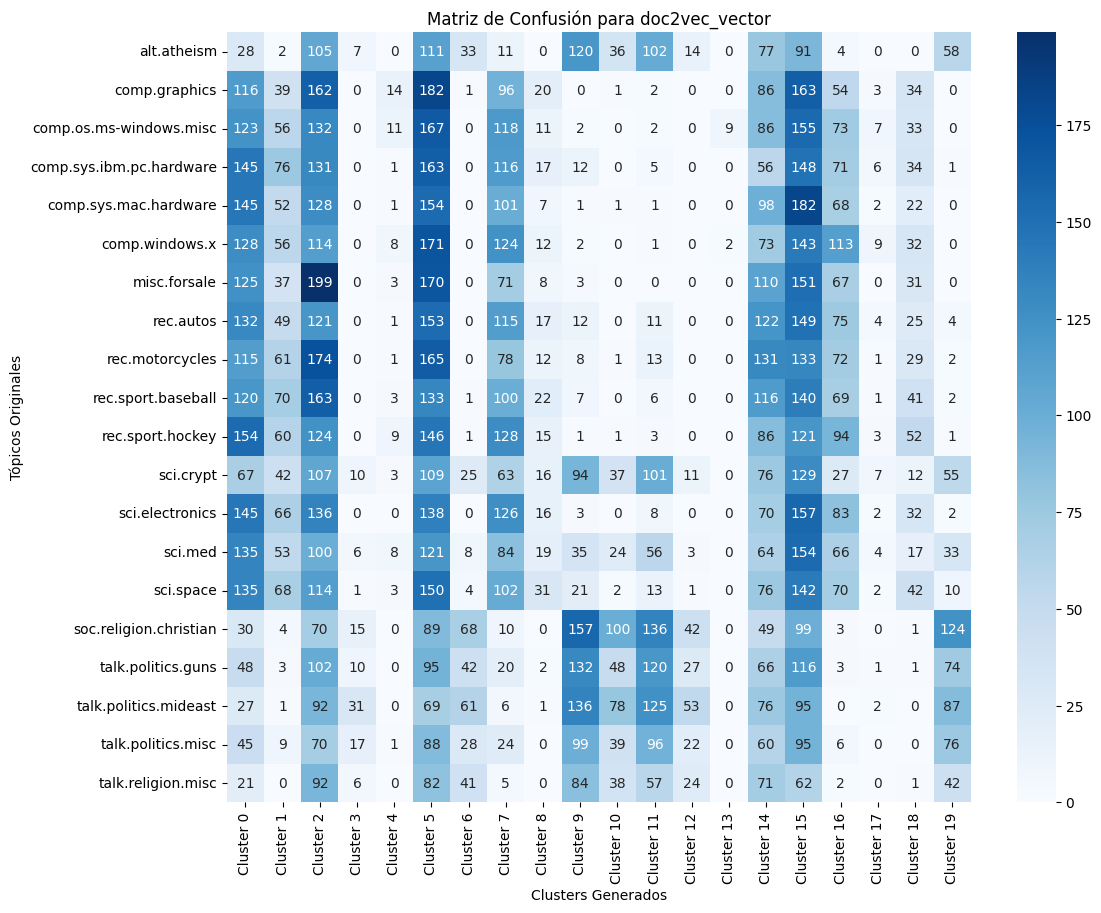

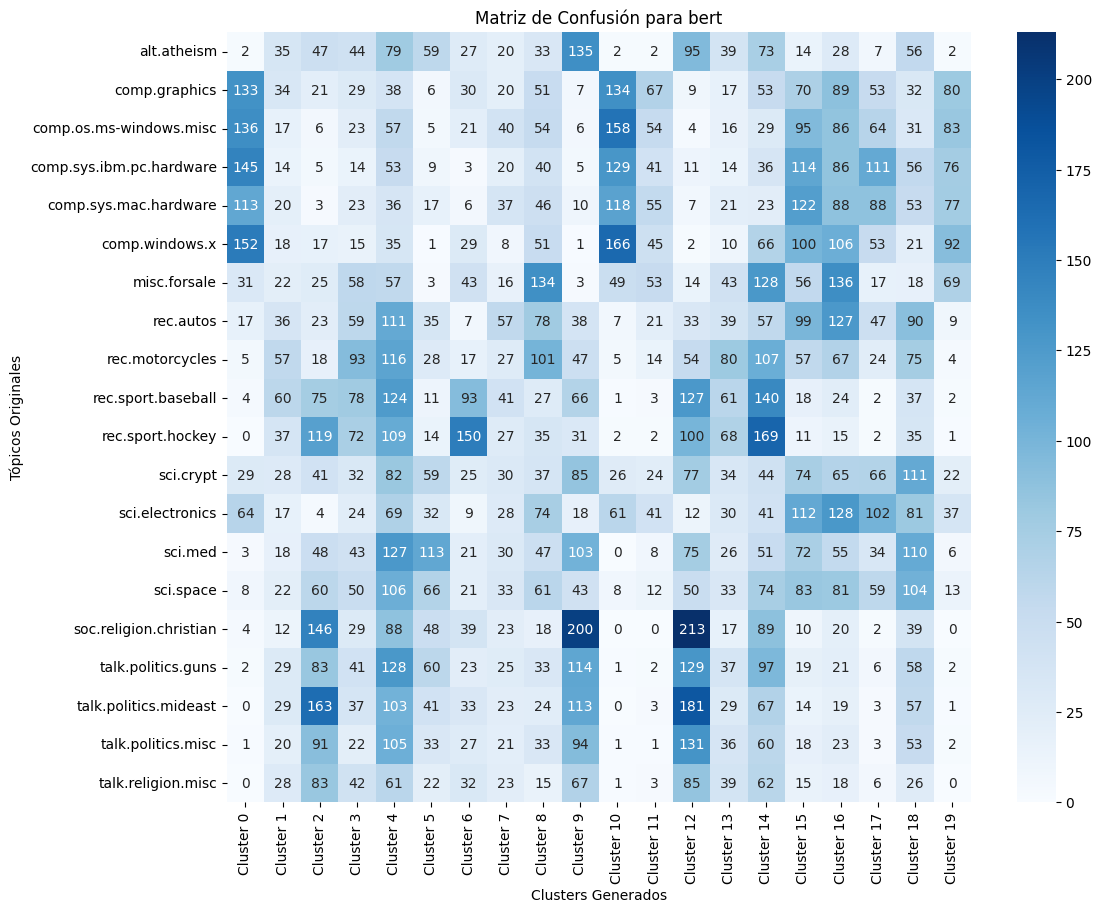

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Definir función para calcular la matriz de confusión entre tópicos originales y clusters generados
def calcular_matriz_confusion(topicos, clusters):
    return pd.DataFrame(confusion_matrix(topicos, clusters))

# Codificar los tópicos en valores numéricos para evitar el problema de mezcla de tipos
label_encoder = LabelEncoder()
topicos_codificados = label_encoder.fit_transform(df_newsgroups['topic'])
topico_labels = label_encoder.classes_  # Etiquetas de los tópicos originales

# Crear un diccionario para almacenar las matrices de confusión
matrices_confusion = {}

# Iterar sobre cada columna de embeddings y calcular la matriz de confusión
for column in vector_columns:
    # Convertir la columna en un array de NumPy
    data = np.array(df_newsgroups[column].tolist())

    # Aplicar PCA para reducir a 2 dimensiones (para K-means de forma coherente con visualización previa)
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)

    # Aplicar K-Means con 20 clusters
    kmeans = KMeans(n_clusters=20, random_state=42)
    clusters = kmeans.fit_predict(reduced_data)

    # Calcular matriz de confusión entre los tópicos originales (codificados) y los clusters generados
    matriz_confusion = calcular_matriz_confusion(topicos_codificados, clusters)

    # Guardar la matriz en el diccionario con el nombre del embedding
    matrices_confusion[column] = matriz_confusion

# Graficar las matrices de confusión para cada embedding
for column, matriz in matrices_confusion.items():
    plt.figure(figsize=(12, 10))
    sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues",
                xticklabels=[f'Cluster {i}' for i in range(20)],
                yticklabels=topico_labels)
    plt.title(f"Matriz de Confusión para {column}")
    plt.xlabel("Clusters Generados")
    plt.ylabel("Tópicos Originales")
    plt.show()


#AMI

Adjusted Mutual Information es una métrica utilizada para evaluar la calidad de agrupamientos o clusters en algoritmos de clustering. La AMI mide la coincidencia entre las etiquetas originales (o verdaderas) de los datos y las etiquetas asignadas por el modelo de clustering.

In [ ]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
import pandas as pd

# Función para calcular la AMI entre tópicos y clusters
def calcular_ami(df_newsgroups, clusters_column):
    # Paso 1: Crear una tabla cruzada de tópicos reales vs clústeres predichos
    cross_tab_topics_clusters = pd.crosstab(df_newsgroups['topic'], df_newsgroups[clusters_column])

    # Paso 2: Crear una tabla para almacenar los valores de AMI entre cada par de tópico y clúster
    topics = df_newsgroups['topic'].unique()
    clusters = df_newsgroups[clusters_column].unique()

    # Inicializar una tabla de información mutua ajustada (AMI) entre tópicos y clústeres
    ami_matrix = pd.DataFrame(index=topics, columns=clusters)

    # Paso 3: Calcular la AMI entre cada par de tópico y clúster
    for topic in topics:
        for cluster in clusters:
            # Crear etiquetas binarias para el tópico y el clúster
            labels_topic = df_newsgroups['topic'].apply(lambda x: 1 if x == topic else 0)
            labels_cluster = df_newsgroups[clusters_column].apply(lambda x: 1 if x == cluster else 0)

            # Calcular la AMI
            ami_score = adjusted_mutual_info_score(labels_topic, labels_cluster)

            # Almacenar el resultado en la tabla
            ami_matrix.loc[topic, cluster] = ami_score

    # Convertir los valores de AMI a tipo float para visualización
    ami_matrix = ami_matrix.astype(float)

    return ami_matrix

# Aplicar la función a cada conjunto de clusters (tfidf, lsa, lda, doc2vec)
ami_tfidf = calcular_ami(df_newsgroups, 'cluster_tfidf')
ami_lsa = calcular_ami(df_newsgroups, 'cluster_lsa')
ami_lda = calcular_ami(df_newsgroups, 'clusters_lda')  # Corrección
ami_doc2vec = calcular_ami(df_newsgroups, 'clusters_doc2vec')  # Corrección
ami_bert = calcular_ami(df_newsgroups, 'cluster_bert')  # Corrección

# Mostrar las tablas de AMI
ami_tfidf, ami_lsa, ami_lda, ami_doc2vec, ami_bert




(                                4         8         16        14        11  \
 rec.sport.hockey          0.037100  0.013208  0.003119  0.012523  0.018716   
 comp.sys.ibm.pc.hardware  0.028205  0.166542  0.003092  0.013674 -0.000107   
 talk.politics.mideast     0.020462  0.014785  0.194375  0.007144  0.017909   
 comp.sys.mac.hardware     0.002503  0.064514  0.003063  0.013497  0.002806   
 sci.electronics           0.013827  0.000821  0.003096  0.012381  0.006637   
 talk.religion.misc        0.000727  0.011108  0.002448  0.057050  0.012007   
 sci.crypt                 0.007020  0.011592  0.003106  0.013758  0.007019   
 sci.med                   0.012835  0.015321  0.003105  0.009298  0.014986   
 alt.atheism              -0.000057  0.013201  0.002786  0.046808  0.012259   
 rec.motorcycles           0.027115  0.005567  0.003114  0.009355  0.015069   
 rec.autos                 0.030372  0.012304  0.003105  0.013748  0.011585   
 comp.windows.x            0.018679  0.009720  0.003

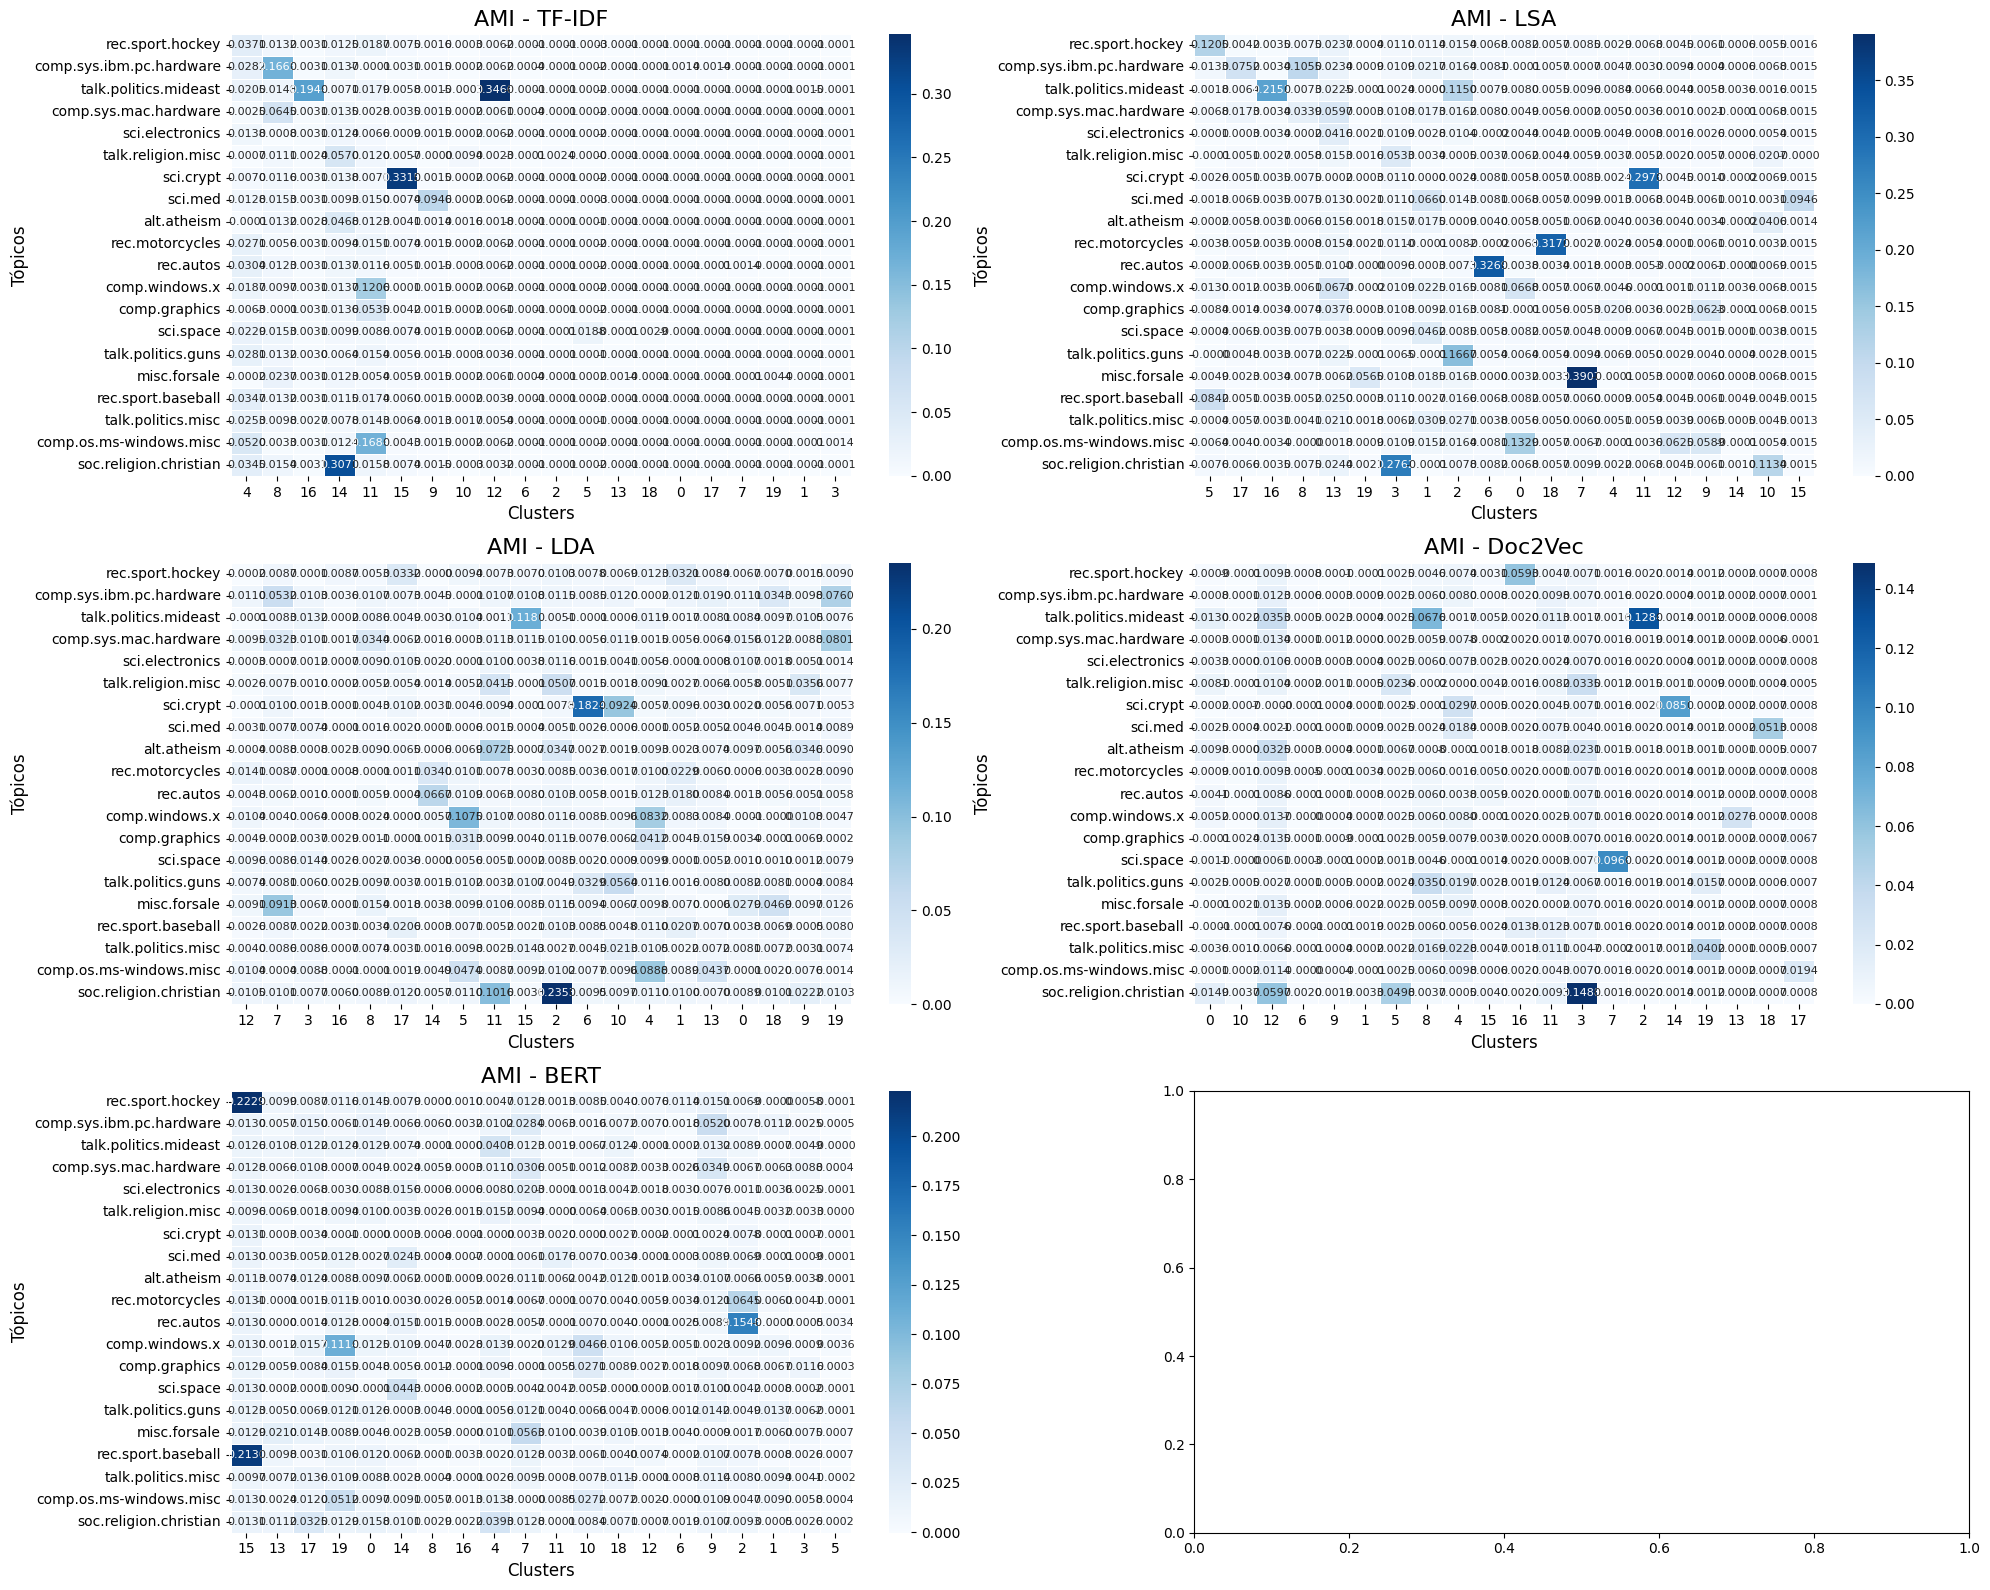

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una matriz de 3x2 con los heatmaps de AMI para cada método: TF-IDF, LSA, LDA, Doc2Vec, BERT
fig, axs = plt.subplots(3, 2, figsize=(20, 16))

# Heatmap para TF-IDF
sns.heatmap(ami_tfidf, annot=True, cmap="Blues", fmt=".4f", linewidths=.5,
            annot_kws={"size": 8}, ax=axs[0, 0])
axs[0, 0].set_title("AMI - TF-IDF", fontsize=16)
axs[0, 0].set_xlabel("Clusters", fontsize=12)
axs[0, 0].set_ylabel("Tópicos", fontsize=12)

# Heatmap para LSA
sns.heatmap(ami_lsa, annot=True, cmap="Blues", fmt=".4f", linewidths=.5,
            annot_kws={"size": 8}, ax=axs[0, 1])
axs[0, 1].set_title("AMI - LSA", fontsize=16)
axs[0, 1].set_xlabel("Clusters", fontsize=12)
axs[0, 1].set_ylabel("Tópicos", fontsize=12)

# Heatmap para LDA
sns.heatmap(ami_lda, annot=True, cmap="Blues", fmt=".4f", linewidths=.5,
            annot_kws={"size": 8}, ax=axs[1, 0])
axs[1, 0].set_title("AMI - LDA", fontsize=16)
axs[1, 0].set_xlabel("Clusters", fontsize=12)
axs[1, 0].set_ylabel("Tópicos", fontsize=12)

# Heatmap para Doc2Vec
sns.heatmap(ami_doc2vec, annot=True, cmap="Blues", fmt=".4f", linewidths=.5,
            annot_kws={"size": 8}, ax=axs[1, 1])
axs[1, 1].set_title("AMI - Doc2Vec", fontsize=16)
axs[1, 1].set_xlabel("Clusters", fontsize=12)
axs[1, 1].set_ylabel("Tópicos", fontsize=12)

# Heatmap para BERT
sns.heatmap(ami_bert, annot=True, cmap="Blues", fmt=".4f", linewidths=.5,
            annot_kws={"size": 8}, ax=axs[2, 0])
axs[2, 0].set_title("AMI - BERT", fontsize=16)
axs[2, 0].set_xlabel("Clusters", fontsize=12)
axs[2, 0].set_ylabel("Tópicos", fontsize=12)

# Ajustar la disposición para evitar solapamientos
plt.tight_layout()
plt.show()



In [ ]:
# Calcular el AMI global como el promedio de todos los valores de la matriz AMI para cada embedding
ami_global_tfidf = ami_tfidf.mean().mean()
ami_global_lsa = ami_lsa.mean().mean()
ami_global_lda = ami_lda.mean().mean()
ami_global_doc2vec = ami_doc2vec.mean().mean()
ami_global_bert = ami_bert.mean().mean()

# Crear un DataFrame para mostrar los AMI globales de cada embedding
df_ami_global = pd.DataFrame({
    'Método': ['TF-IDF', 'LSA', 'LDA', 'Doc2Vec', 'BERT'],
    'AMI Global': [ami_global_tfidf, ami_global_lsa, ami_global_lda, ami_global_doc2vec, ami_global_bert]
})

# Mostrar la tabla de AMI global
df_ami_global


Método  AMI Global
0   TF-IDF    0.008169
1      LSA    0.014096
2      LDA    0.010928
3  Doc2Vec    0.005184
4     BERT    0.008592

AMI Global son muy bajos (todos están cerca de 0), lo que indica que los clusters generados por cada método de embedding tienen una baja coincidencia con las etiquetas verdaderas. Los embedings no son buenos para  capturar la estructura de temas con estos embeddings. Modificar parametros?